In [19]:
################################################################################################################################
#
# ECONOMETRIC - ROLLING - LN - MONTHLY - ARMA FracDiff
#
################################################################################################################################

#-------------------------------------------------------------------------------------------------------------------------------
#    Price           MSE   RMSE
#-------------------------------
# 5  ARMA FracDiff     0      0
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# ENVIRONMENT: LIBRARIES
#===============================================================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pmdarima as pmd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
################################################################################################################################
# DATA
################################################################################################################################

#===============================================================================================================================
# DATA: READ
#===============================================================================================================================
seriesId='IBOV-FracDiff-Ln-Monthly'
df = pd.read_csv('Data/Input/'+seriesId+'.csv')
#df.drop(['Open','Low','High', 'Qt'], axis='columns', inplace=True )
PERIOD=12
df

,Date,Close
0,2006-01-31,3.917126
1,2006-02-24,3.881832
2,2006-03-31,3.842665
3,2006-04-28,3.892926
4,2006-05-31,3.770014
...,...,...
211,2023-08-31,4.087320
212,2023-09-29,4.097383
213,2023-10-31,4.065104
214,2023-11-30,4.187422


In [21]:
#===============================================================================================================================
# DATA: DATETIME
#===============================================================================================================================
df['Date'] =pd.to_datetime(df['Date'], dayfirst=True)
df

C:\Users\55119\AppData\Local\Temp\ipykernel_16892\3116847714.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] =pd.to_datetime(df['Date'], dayfirst=True)


,Date,Close
0,2006-01-31,3.917126
1,2006-02-24,3.881832
2,2006-03-31,3.842665
3,2006-04-28,3.892926
4,2006-05-31,3.770014
...,...,...
211,2023-08-31,4.087320
212,2023-09-29,4.097383
213,2023-10-31,4.065104
214,2023-11-30,4.187422


In [22]:
#===============================================================================================================================
# DATA: SET INDEX
#===============================================================================================================================
df2 = df.set_index('Date')
df2

,Close
Date,
2006-01-31,3.917126
2006-02-24,3.881832
2006-03-31,3.842665
2006-04-28,3.892926
2006-05-31,3.770014
...,...
2023-08-31,4.087320
2023-09-29,4.097383
2023-10-31,4.065104


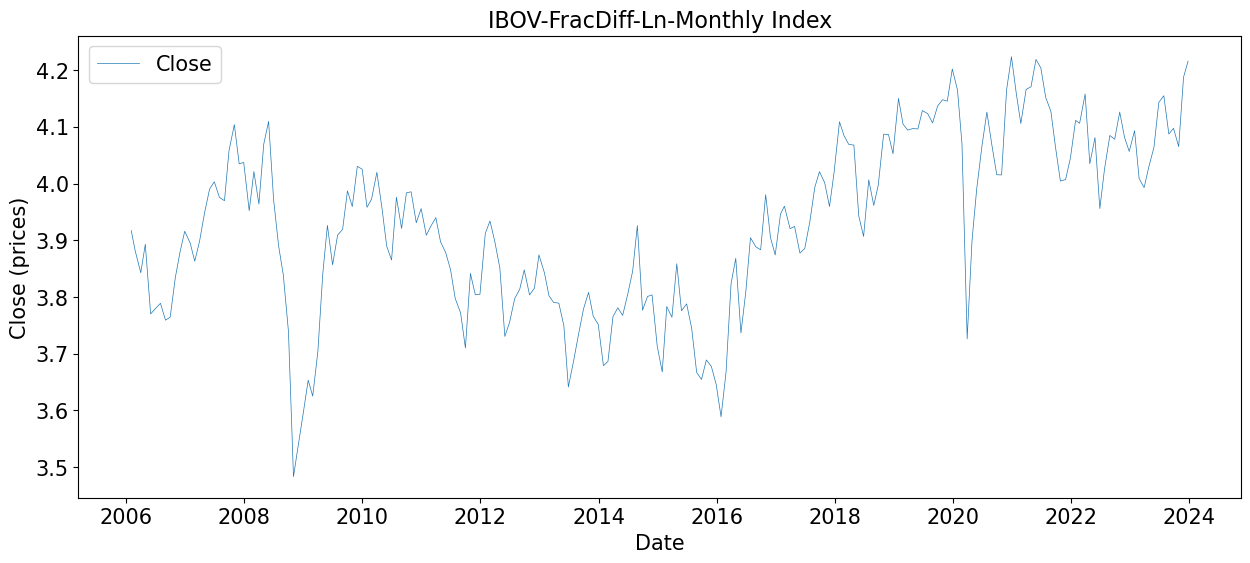

In [23]:
#===============================================================================================================================
# DATA: PLOT
#===============================================================================================================================
plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['Close'], label = "Close", linewidth=0.5)
plt.title(seriesId+' Index', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close (prices)', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,1))
plt.show()


In [24]:
#===============================================================================================================================
# DATA: LOG
#===============================================================================================================================
dfln = df.copy()
#dfln['CloseLn']= np.log(dfln['Close'])
dfln['CloseLn']= dfln['Close']
dfln

,Date,Close,CloseLn
0,2006-01-31,3.917126,3.917126
1,2006-02-24,3.881832,3.881832
2,2006-03-31,3.842665,3.842665
3,2006-04-28,3.892926,3.892926
4,2006-05-31,3.770014,3.770014
...,...,...,...
211,2023-08-31,4.087320,4.087320
212,2023-09-29,4.097383,4.097383
213,2023-10-31,4.065104,4.065104
214,2023-11-30,4.187422,4.187422


In [25]:
#===============================================================================================================================
# DATA: LOG - SET INDEX
#===============================================================================================================================
dfln2 = dfln.set_index('Date')
dfln2

,Close,CloseLn
Date,,
2006-01-31,3.917126,3.917126
2006-02-24,3.881832,3.881832
2006-03-31,3.842665,3.842665
2006-04-28,3.892926,3.892926
2006-05-31,3.770014,3.770014
...,...,...
2023-08-31,4.087320,4.087320
2023-09-29,4.097383,4.097383
2023-10-31,4.065104,4.065104


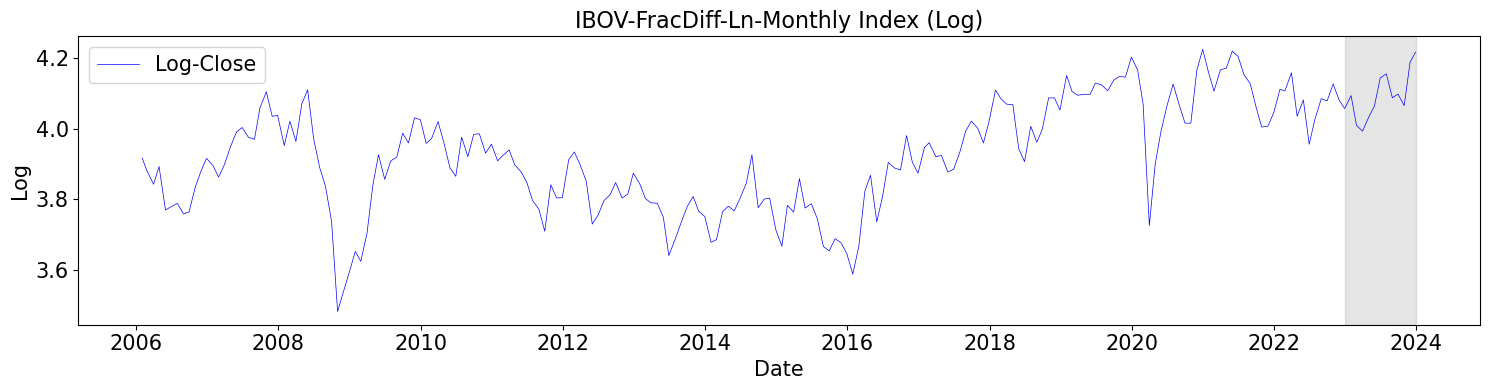

In [26]:
#===============================================================================================================================
# DATA: LOG - PLOT
#===============================================================================================================================
plt.figure(figsize=(15,4))
plt.plot(dfln['Date'], dfln['CloseLn'], 'b-', label = "Log-Close", linewidth=0.5)
plt.title(seriesId+' Index (Log)', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,1))
plt.tight_layout()
plt.show()


In [27]:
#===============================================================================================================================
# DATA: LOG-DIFF
#===============================================================================================================================
dfln['CloseLnDiff'] = 0
dfln.loc[1:, ['CloseLnDiff']] = dfln.loc[:, 'CloseLn'].diff()
dfln

,Date,Close,CloseLn,CloseLnDiff
0,2006-01-31,3.917126,3.917126,0.000000
1,2006-02-24,3.881832,3.881832,-0.035294
2,2006-03-31,3.842665,3.842665,-0.039166
3,2006-04-28,3.892926,3.892926,0.050261
4,2006-05-31,3.770014,3.770014,-0.122912
...,...,...,...,...
211,2023-08-31,4.087320,4.087320,-0.067487
212,2023-09-29,4.097383,4.097383,0.010063
213,2023-10-31,4.065104,4.065104,-0.032279
214,2023-11-30,4.187422,4.187422,0.122318


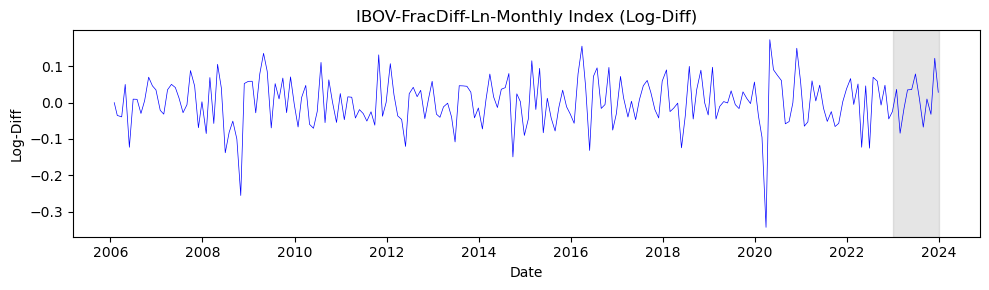

In [28]:
#===============================================================================================================================
# DATA: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
plt.title(seriesId+' Index (Log-Diff)', fontsize=12)
ax.plot(dfln['Date'], dfln['CloseLnDiff'], 'b-', label = "Log-Diff Close", linewidth=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Log-Diff')
ax.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.tight_layout()

In [29]:
#===============================================================================================================================
# DATA: SPLIT
#===============================================================================================================================
totallen = len(df)
trainlen = len(df2[:'2022'])
testlen  = len(df2['2023':])

trainfin = trainlen-1
testini  = trainlen

train = df[:testini]
test  = df[testini:]

print("Train Len", trainlen, "Length Total =", totallen, "| Train Fin =", trainfin, "| Test Ini =", testini)
#-------------------------------------------------------------------------------------------------------------------------------
# Train Len 204 Length Total = 216 | Train Fin = 203 | Test Ini = 204
#-------------------------------------------------------------------------------------------------------------------------------
train

Train Len 204 Length Total = 216 | Train Fin = 203 | Test Ini = 204


,Date,Close
0,2006-01-31,3.917126
1,2006-02-24,3.881832
2,2006-03-31,3.842665
3,2006-04-28,3.892926
4,2006-05-31,3.770014
...,...,...
199,2022-08-31,4.084772
200,2022-09-30,4.078086
201,2022-10-31,4.126112
202,2022-11-30,4.081267


In [30]:
################################################################################################################################
# ROLLING FORECAST
################################################################################################################################
from statsmodels.tsa.statespace.sarimax import SARIMAX

#===============================================================================================================================
# ROLLING FORECAST: PARAMETERS
#===============================================================================================================================
HORIZON = len(test)
WINDOW = 1

#===============================================================================================================================
# ROLLING FORECAST: FUNCTION
#===============================================================================================================================
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str, orderparam=(0,0,0)) -> list:   
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean
    elif method == 'last':
        pred_last = []
        
        for i in range(train_len, total_len, window):
            last = df.loc[i]
            pred_last.extend(last for _ in range(window))
        return pred_last
    elif method == 'MA':
        pred_MA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("θ1 = {}, θ2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_MA
    elif method == 'AR':
        pred_AR = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)
            
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("phi1 = {}, phi2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_AR
    elif method == 'ARMA':
        pred_ARMA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)  
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
            
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("θ = {}, σ2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_ARMA

In [31]:
################################################################################################################################
# BASELINES
################################################################################################################################

#===============================================================================================================================
# BASELINES: LOG - FORECAST - last, mean
#===============================================================================================================================
pred_LastLn = rolling_forecast(dfln['CloseLn'], trainfin, HORIZON, WINDOW, 'last')
pred_MeanLn = rolling_forecast(dfln['CloseLn'], trainfin+1, HORIZON, WINDOW, 'mean')

#===============================================================================================================================
# BASELINES: LOG - COPY testln - last, mean 
#===============================================================================================================================
testln = dfln.loc[trainfin:,['Date','CloseLn']]
testln.loc[testini:,'pred_LastLn'] = pred_LastLn
testln.loc[testini:,'pred_MeanLn'] = pred_MeanLn

testln

,Date,CloseLn,pred_LastLn,pred_MeanLn
203,2022-12-29,4.056669,NaN,NaN
204,2023-01-31,4.093338,4.056669,3.918201
205,2023-02-28,4.009027,4.093338,3.919055
206,2023-03-31,3.992839,4.009027,3.919492
207,2023-04-28,4.028022,3.992839,3.919846
208,2023-05-31,4.064120,4.028022,3.920366
209,2023-06-30,4.143223,4.064120,3.921054
210,2023-07-31,4.154807,4.143223,3.922112
211,2023-08-31,4.087320,4.154807,3.923215
212,2023-09-29,4.097383,4.087320,3.923989


In [32]:
#===============================================================================================================================
# BASELINES: LOG - COPY dfln - last, mean 
#===============================================================================================================================
dfln['pred_LastLn'] = 0.0
dfln['pred_MeanLn'] = 0.0

dfln.loc[testini:,'pred_LastLn']=testln.loc[testini:,'pred_LastLn']
dfln.loc[testini:,'pred_MeanLn']=testln.loc[testini:,'pred_MeanLn']

dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn
203,2022-12-29,4.056669,4.056669,-0.024598,0.000000,0.000000
204,2023-01-31,4.093338,4.093338,0.036669,4.056669,3.918201
205,2023-02-28,4.009027,4.009027,-0.084311,4.093338,3.919055
206,2023-03-31,3.992839,3.992839,-0.016189,4.009027,3.919492
207,2023-04-28,4.028022,4.028022,0.035183,3.992839,3.919846
208,2023-05-31,4.064120,4.064120,0.036099,4.028022,3.920366
209,2023-06-30,4.143223,4.143223,0.079102,4.064120,3.921054
210,2023-07-31,4.154807,4.154807,0.011585,4.143223,3.922112
211,2023-08-31,4.087320,4.087320,-0.067487,4.154807,3.923215
212,2023-09-29,4.097383,4.097383,0.010063,4.087320,3.923989


In [33]:
#===============================================================================================================================
# BASELINES: LOG - PERFORMANCE - last, mean
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,4))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,4))  , "{:,}".format(round(sqrt(mse_Mean),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Log      MSE    RMSE
#------------------------
# 0 Last  0.0033  0.0571
# 1 Mean  0.0341  0.1846
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.0033,0.0571
1,Mean,0.0341,0.1846


Text(0, 0.5, 'Log')

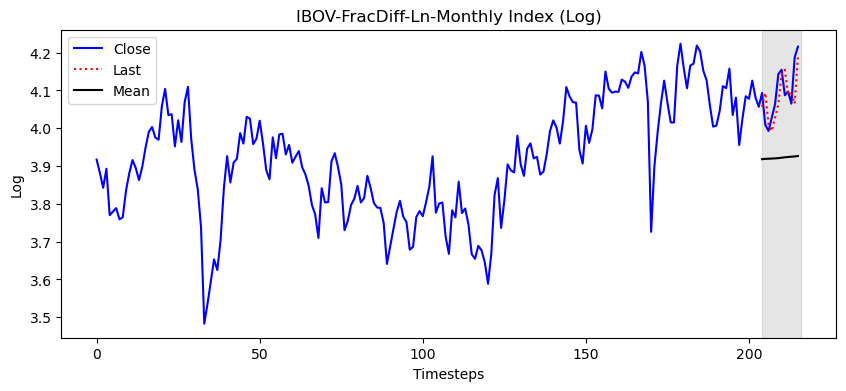

In [34]:
#===============================================================================================================================
# BASELINES: LOG - PLOT - close, last, mean
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Log)', fontsize=12)
ax3.plot(dfln['CloseLn'], 'b-', label='Close')
ax3.plot(dfln.loc[testini:,'pred_LastLn'], 'r:', label='Last')
ax3.plot(dfln.loc[testini:,'pred_MeanLn'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Log')

Text(0, 0.5, 'Log')

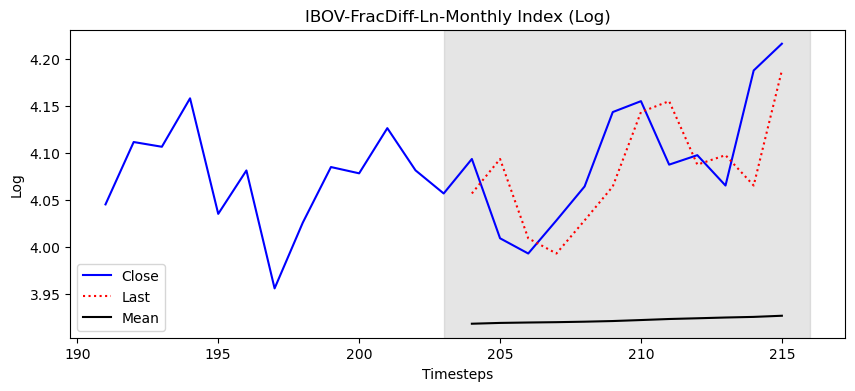

In [35]:
#===============================================================================================================================
# BASELINES: LOG - Plot (zoom) - close, last, mean
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Log)', fontsize=12)
ax3.plot(dfln.loc[trainfin-testlen:,'CloseLn'    ], 'b-', label='Close')
ax3.plot(dfln.loc[testini:  ,'pred_LastLn'], 'r:', label='Last')
ax3.plot(dfln.loc[testini:  ,'pred_MeanLn'], 'k-', label='Mean')
ax3.axvspan(trainfin, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=3)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Log')


In [36]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER
#===============================================================================================================================
df['pred_Last'] = 0.0
df['pred_Mean'] = 0.0


pred_Last = rolling_forecast(dfln['Close'], trainfin, HORIZON, WINDOW, 'last')
pred_Mean = rolling_forecast(dfln['Close'], trainfin+1, HORIZON, WINDOW, 'mean')

df.loc[testini:,'pred_Last']= pred_Last
df.loc[testini:,'pred_Mean']= np.round(pred_Mean,2)


df[testini-1:]

,Date,Close,pred_Last,pred_Mean
203,2022-12-29,4.056669,0.000000,0.00
204,2023-01-31,4.093338,4.056669,3.92
205,2023-02-28,4.009027,4.093338,3.92
206,2023-03-31,3.992839,4.009027,3.92
207,2023-04-28,4.028022,3.992839,3.92
208,2023-05-31,4.064120,4.028022,3.92
209,2023-06-30,4.143223,4.064120,3.92
210,2023-07-31,4.154807,4.143223,3.92
211,2023-08-31,4.087320,4.154807,3.92
212,2023-09-29,4.097383,4.087320,3.92


In [37]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,4))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,4))  , "{:,}".format(round(sqrt(mse_Mean),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Price        MSE   RMSE
#---------------------------
# 0 Last      0.0001 0.0112
# 1 Mean      0.0179 0.1337
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,0.0033,0.0571
1,Mean,0.0341,0.1847


Text(0, 0.5, 'Prices')

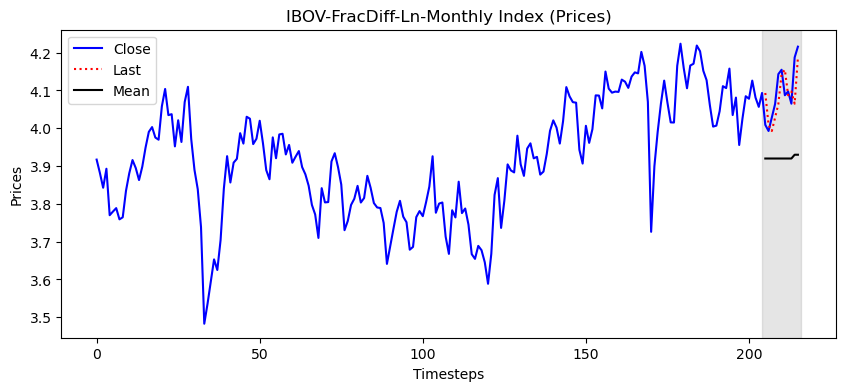

In [38]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PLOT
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Prices)', fontsize=12)
ax3.plot(df['Close'], 'b-', label='Close')
ax3.plot(df.loc[testini+1:,'pred_Last'], 'r:', label='Last')
ax3.plot(df.loc[testini+1:,'pred_Mean'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Prices')

Text(0, 0.5, 'Prices')

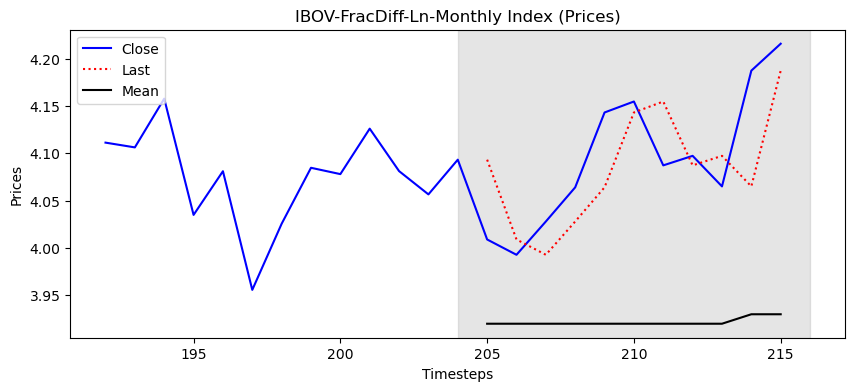

In [39]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PLOT (zoom)
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Prices)', fontsize=12)
ax3.plot(df.loc[testini-testlen:,'Close'    ], 'b-', label='Close')
ax3.plot(df.loc[testini+1:  ,'pred_Last'], 'r:', label='Last')
ax3.plot(df.loc[testini+1:  ,'pred_Mean'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Prices')

In [40]:
################################################################################################################################
# STATIONARITY
################################################################################################################################

#===============================================================================================================================
# STATIONARITY: LOG - ADF test
#===============================================================================================================================
ADF_Close = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ADF_Close[0],3)}')
print(f'ADF p-value  : {np.round(ADF_Close[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -3.004
# ADF p-value  : 0.03 < 0.05
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -3.004
ADF p-value  : 0.03


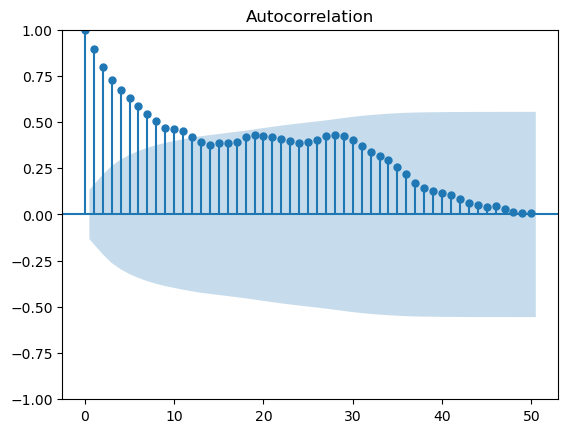

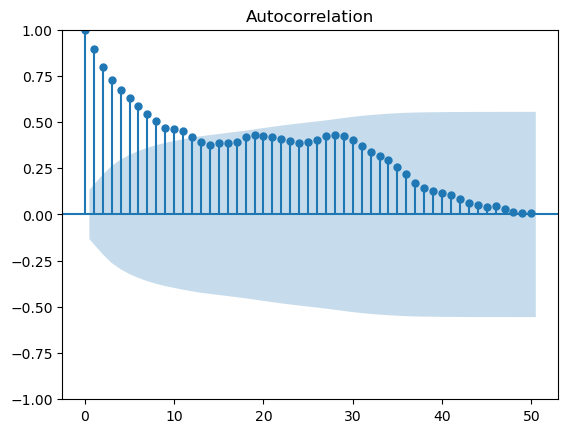

In [41]:
#===============================================================================================================================
# STATIONARITY: LOG - ACF plot
#===============================================================================================================================
plot_acf(dfln['CloseLn'], lags=50)

#-------------------------------------------------------------------------------------------------------------------------------
# Significant AC coefficients slowly decreasing after lag 0 
#-------------------------------------------------------------------------------------------------------------------------------
# ***** AUTOCORRELATION present ******
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# DATA STATIONARITY: LOG - ADF test + ACF plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NO RANDOM-WALK *****
#-------------------------------------------------------------------------------------------------------------------------------

In [42]:
#===============================================================================================================================
# STATIONARITY: LOG-DIFF - ADF test
#===============================================================================================================================
ADF_Close = adfuller(dfln['CloseLnDiff'])
print(f'ADF Statistic: {np.round(ADF_Close[0],3)}')
print(f'ADF p-value  : {np.round(ADF_Close[1],2)}')
#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -11.817
# ADF p-value  : 0.0
# Null hypothesis rejected - No Unit Root
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -11.817
ADF p-value  : 0.0


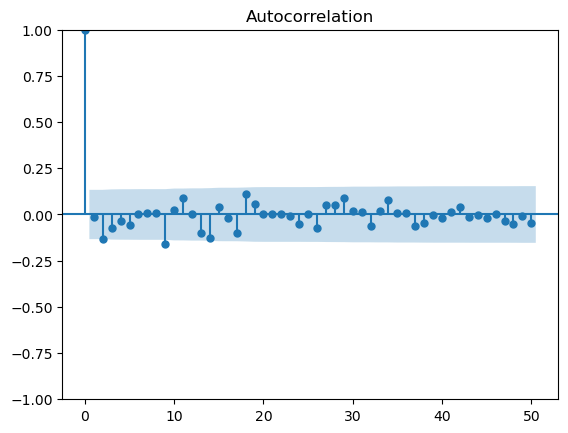

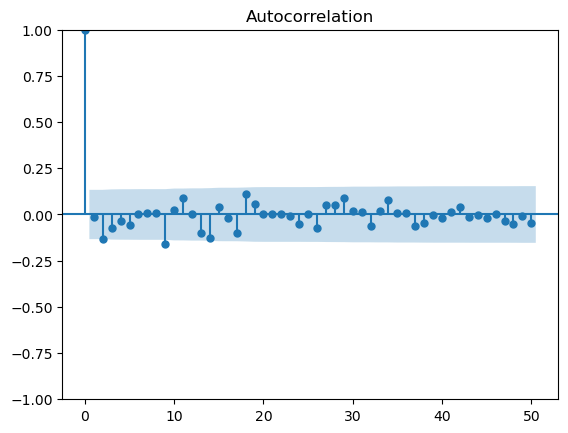

In [43]:
#===============================================================================================================================
# STATIONARITY: LOG-DIFF - ACF plot
#===============================================================================================================================
plot_acf(dfln['CloseLnDiff'], lags=50)
#-------------------------------------------------------------------------------------------------------------------------------
# Significant AC coefficients after lag 0: 9* 
#-------------------------------------------------------------------------------------------------------------------------------
# ***** AUTOCORRELATION *****
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# DATA STATIONARITY: LOG-DIFF - ADF test + ACF plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NO RANDOM WALK *****
#-------------------------------------------------------------------------------------------------------------------------------

In [44]:
###############################################################################################################################
#
# MOVING AVERAGE (MA)
#
###############################################################################################################################

In [45]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - ADF Test & ACF Plot
#===============================================================================================================================

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Test: Stationary
# ACF Plot: No Significant Coefficients after lag 0: 9*
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY + AUTOCORRELATION => NO RANDOM WALK => MOVING AVERAGE MA(1) or MA(6) *****
#-------------------------------------------------------------------------------------------------------------------------------

In [46]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - FORECAST
#===============================================================================================================================
pred_MALnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'MA',(0,0,9))
pred_MALnDiff

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                  215
# Model:               SARIMAX(0, 0, 9)   Log Likelihood                 284.222
# Date:                Wed, 22 May 2024   AIC                           -548.445
# Time:                        19:04:13   BIC                           -514.738
# Sample:                             0   HQIC                          -534.826
#                                 - 215                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0610      0.066     -0.929      0.353      -0.190       0.068
# ma.L2         -0.1546      0.080     -1.935      0.053      -0.311       0.002
# ma.L3         -0.1167      0.080     -1.458      0.145      -0.274       0.040
# ma.L4         -0.0923      0.074     -1.248      0.212      -0.237       0.053
# ma.L5         -0.1141      0.079     -1.450      0.147      -0.268       0.040
# ma.L6          0.0170      0.074      0.229      0.819      -0.128       0.162
# ma.L7          0.0105      0.082      0.129      0.897      -0.150       0.171
# ma.L8         -0.0284      0.067     -0.423      0.672      -0.160       0.103
# ma.L9         -0.1590      0.085     -1.879      0.060      -0.325       0.007
# sigma2         0.0041      0.000     12.432      0.000       0.003       0.005
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               189.96
# Prob(Q):                              0.92   Prob(JB):                         0.00
# Heteroskedasticity (H):               1.15   Skew:                            -1.04
# Prob(H) (two-sided):                  0.55   Kurtosis:                         7.11
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# θ1 = -0.0609604604032944, θ2 = -0.15463270814667127
# 
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                  215
Model:               SARIMAX(0, 0, 9)   Log Likelihood                 284.222
Date:                Thu, 13 Jun 2024   AIC                           -548.445
Time:                        18:32:05   BIC                           -514.738
Sample:                             0   HQIC                          -534.826
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0610      0.066     -0.929      0.353      -0.190       0.068
ma.L2         -0.1546      0.080     -1.935      0.053      -0.311       0.002
ma.L3         -0.1167      0.080     -1.458      0.1

[0.009399287033104962,
 -0.00036102973646578605,
 0.019115632049608127,
 0.009661144857396805,
 0.004736869091347699,
 0.0012062661725179228,
 -0.0073689898851583,
 -0.0069652824890898786,
 -0.01485989758933508,
 -0.005325062218483377,
 0.006202288934892854,
 0.003909613000469675]

In [47]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - COPY  testln
#===============================================================================================================================
testln.loc[testini:,'pred_MALnDiff'] = 0
testln.loc[testini:,'pred_MALnDiff'] = pred_MALnDiff
testln.loc[testini:,'pred_MALnDiff'].to_excel('Data/Output/Rolling-Ln-Monthly-ARMA FracDiff-MALnDiff.xlsx')

testln

,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff
203,2022-12-29,4.056669,NaN,NaN,NaN
204,2023-01-31,4.093338,4.056669,3.918201,0.009399
205,2023-02-28,4.009027,4.093338,3.919055,-0.000361
206,2023-03-31,3.992839,4.009027,3.919492,0.019116
207,2023-04-28,4.028022,3.992839,3.919846,0.009661
208,2023-05-31,4.064120,4.028022,3.920366,0.004737
209,2023-06-30,4.143223,4.064120,3.921054,0.001206
210,2023-07-31,4.154807,4.143223,3.922112,-0.007369
211,2023-08-31,4.087320,4.154807,3.923215,-0.006965
212,2023-09-29,4.097383,4.087320,3.923989,-0.014860


In [48]:
dfln.loc[testini:,'CloseLnDiff']

204    0.036669
205   -0.084311
206   -0.016189
207    0.035183
208    0.036099
209    0.079102
210    0.011585
211   -0.067487
212    0.010063
213   -0.032279
214    0.122318
215    0.028444
Name: CloseLnDiff, dtype: float64

In [49]:
#===============================================================================================================================
# MA: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Log Diff       MSE      RMSE
#-------------------------------
# 0 MA        0.003016   0.05492
#-------------------------------------------------------------------------------------------------------------------------------

,Log Diff,MSE,RMSE
0,MA,0.003016,0.05492


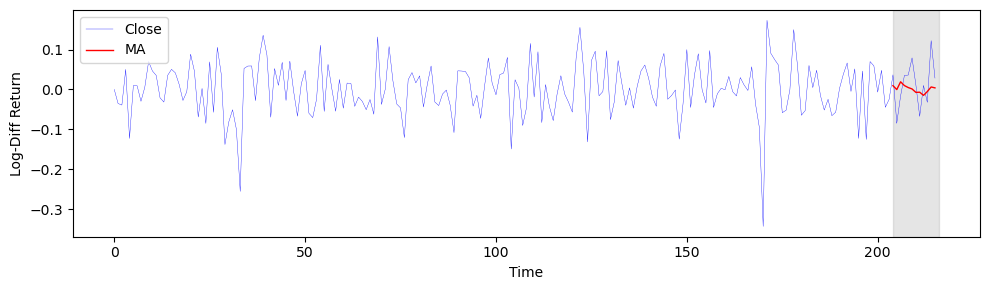

In [50]:
#===============================================================================================================================
# MA: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[:testini+1,'CloseLnDiff']        ,'b-', linewidth=0.25) 
ax.plot(dfln.loc[testini+1:totallen,'CloseLnDiff'],'b-', linewidth=0.25, label='Close')
ax.plot(testln.loc[:totallen,'pred_MALnDiff']     ,'r-', linewidth=1.0, label='MA')
ax.axvspan(testini,totallen, color='#808080', alpha=0.2)
ax.legend(loc=2)
#plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()


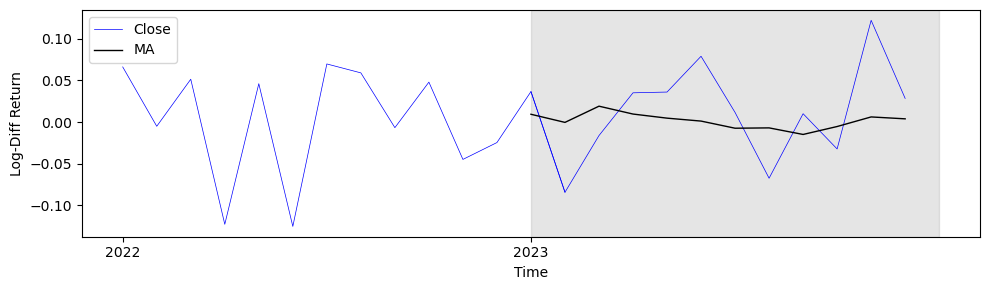

In [51]:
#===============================================================================================================================
# MA: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:testini+1,'CloseLnDiff'],'b-', linewidth=0.5) 
ax.plot(dfln.loc[testini:totallen,'CloseLnDiff']         ,'b-', linewidth=0.5, label='Close')
ax.plot(testln.loc[testini:totallen,'pred_MALnDiff']     ,'k-', linewidth=1.0, label='MA')
ax.axvspan(testini,totallen, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()


In [52]:
#===============================================================================================================================
# MA: LOG - RECOVER
#===============================================================================================================================
dfln['pred_MALn'] = 0.0
dfln.loc[testini:,'pred_MALn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_MALnDiff']
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn
203,2022-12-29,4.056669,4.056669,-0.024598,0.000000,0.000000,0.000000
204,2023-01-31,4.093338,4.093338,0.036669,4.056669,3.918201,4.066068
205,2023-02-28,4.009027,4.009027,-0.084311,4.093338,3.919055,4.092977
206,2023-03-31,3.992839,3.992839,-0.016189,4.009027,3.919492,4.028143
207,2023-04-28,4.028022,4.028022,0.035183,3.992839,3.919846,4.002500
208,2023-05-31,4.064120,4.064120,0.036099,4.028022,3.920366,4.032759
209,2023-06-30,4.143223,4.143223,0.079102,4.064120,3.921054,4.065327
210,2023-07-31,4.154807,4.154807,0.011585,4.143223,3.922112,4.135854
211,2023-08-31,4.087320,4.087320,-0.067487,4.154807,3.923215,4.147842
212,2023-09-29,4.097383,4.097383,0.010063,4.087320,3.923989,4.072460


In [53]:
#===============================================================================================================================
# MA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#
#-------------------------------------------------------------------------------------------------------------------------------
#    Log   MSE       RMSE
#----------------------------
# 0  Last  0.00326  0.057093
# 1  Mean  0.03408  0.184607
# 2  MA    0.03016  0.054920
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.00326,0.057093
1,Mean,0.03408,0.184607
2,MA,0.003016,0.05492


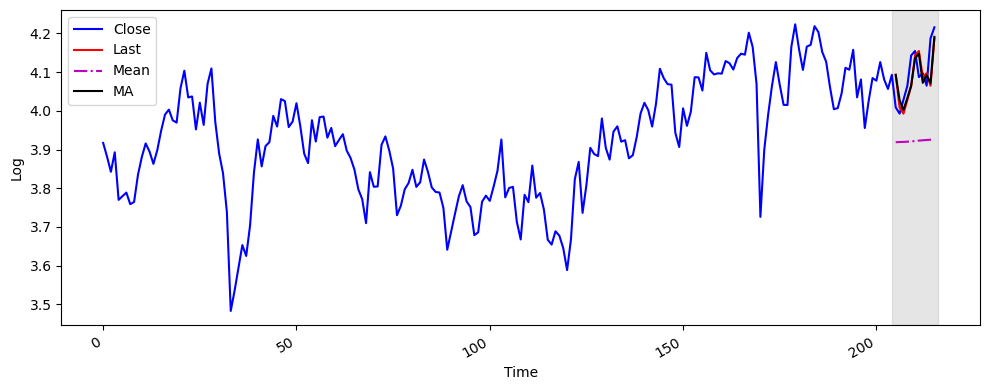

In [54]:
#===============================================================================================================================
# MA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln['CloseLn'], 'b-', label='Close')    
ax.plot(dfln.loc[testini+1:,'pred_LastLn'], 'r-' , label='Last')
ax.plot(dfln.loc[testini+1:,'pred_MeanLn'], 'm-.', label='Mean')
ax.plot(dfln.loc[testini+1:,'pred_MALn']  , 'k-' , label='MA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2002, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


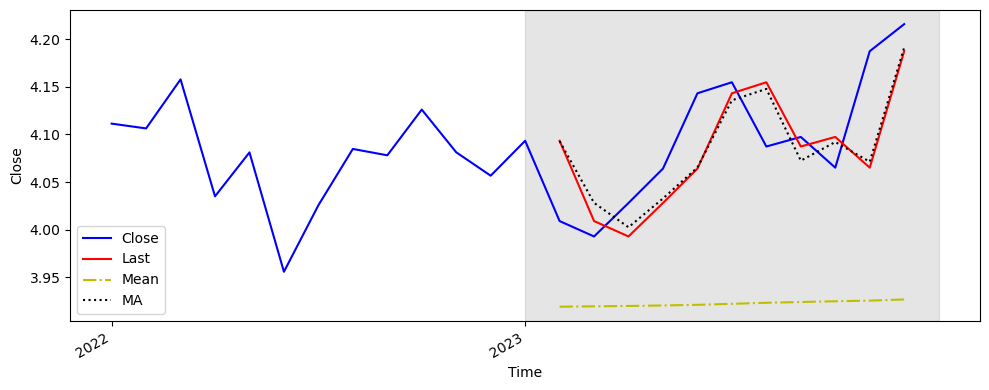

In [55]:
#===============================================================================================================================
# MA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'] , 'b-' , label='Close')    
ax.plot(dfln.loc[testini+1:,'pred_LastLn']  , 'r-' , label='Last')
ax.plot(dfln.loc[testini+1:,'pred_MeanLn']  , 'y-.', label='Mean')
ax.plot(dfln.loc[testini+1:,'pred_MALn']    , 'k:' , label='MA')   

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [56]:
#===============================================================================================================================
# MA: PRICE - RECOVER
#===============================================================================================================================
df['pred_MA'] = 0.0
#df.loc[testini:,'pred_MA']= np.round(np.exp(dfln.loc[testini:,'pred_MALn']),2)
df.loc[testini:,'pred_MA']= np.round(dfln.loc[testini:,'pred_MALn'],6)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA
203,2022-12-29,4.056669,0.000000,0.00,0.000000
204,2023-01-31,4.093338,4.056669,3.92,4.066068
205,2023-02-28,4.009027,4.093338,3.92,4.092977
206,2023-03-31,3.992839,4.009027,3.92,4.028143
207,2023-04-28,4.028022,3.992839,3.92,4.002500
208,2023-05-31,4.064120,4.028022,3.92,4.032759
209,2023-06-30,4.143223,4.064120,3.92,4.065327
210,2023-07-31,4.154807,4.143223,3.92,4.135854
211,2023-08-31,4.087320,4.154807,3.92,4.147842
212,2023-09-29,4.097383,4.087320,3.92,4.072460


In [57]:
#===============================================================================================================================
# MA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6))  , "{:,}".format(round(sqrt(mse_Mean),4))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA  ),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price       MSE    RMSE
#----------------------------
# 0  Last   0.003260  0.0571
# 1  Mean   0.034098  0.1847
# 2  MA     0.003016  0.0549
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,0.00326,0.0571
1,Mean,0.034098,0.1847
2,MA,0.003016,0.0549


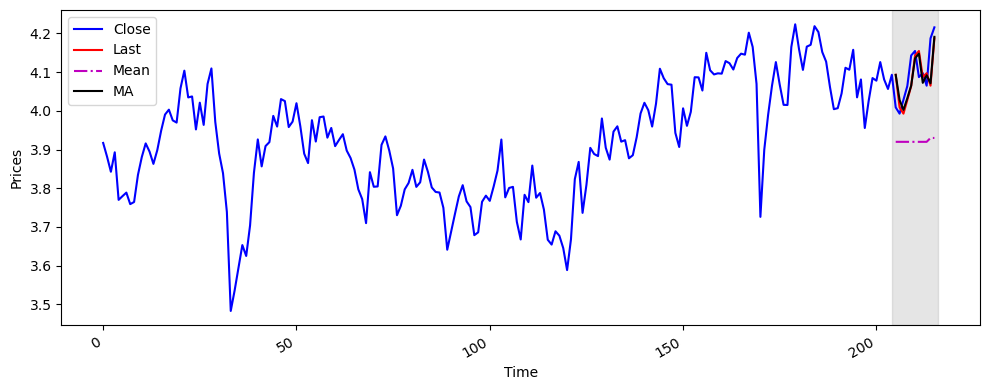

In [58]:
#===============================================================================================================================
# MA: PRICES - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini+1:,'pred_Last'], 'r-' , label='Last')
ax.plot(df.loc[testini+1:,'pred_Mean'], 'm-.', label='Mean')
ax.plot(df.loc[testini+1:,'pred_MA']  , 'k-' , label='MA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Prices')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

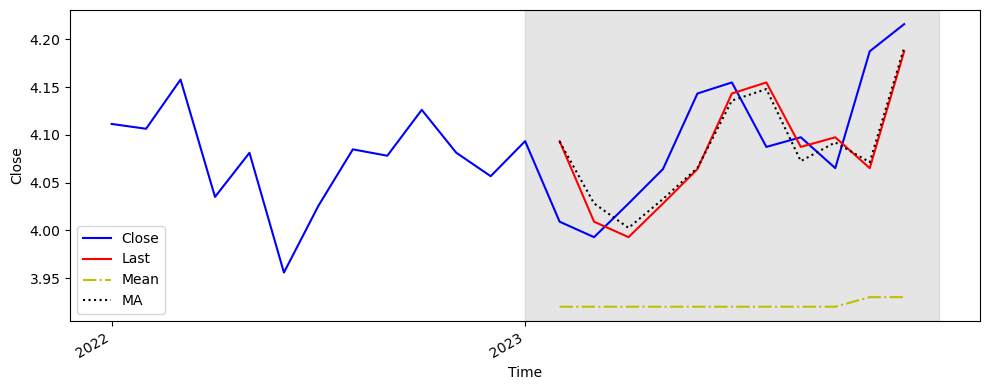

In [59]:
#===============================================================================================================================
# MA: PRICES - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close'] , 'b-' , label='Close')    
ax.plot(df.loc[testini+1:,'pred_Last']  , 'r-' , label='Last')
ax.plot(df.loc[testini+1:,'pred_Mean']  , 'y-.', label='Mean')
ax.plot(df.loc[testini+1:,'pred_MA']    , 'k:' , label='MA')   

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [60]:
################################################################################################################################
#
# AUTOREGRESSIVE (AR)
#
################################################################################################################################

In [61]:
#===============================================================================================================================
# AR: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF Test: Statistics, p-value -> Non Stationary
# ACF Plot: Slowing decaying -> AutoCorrelation present
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

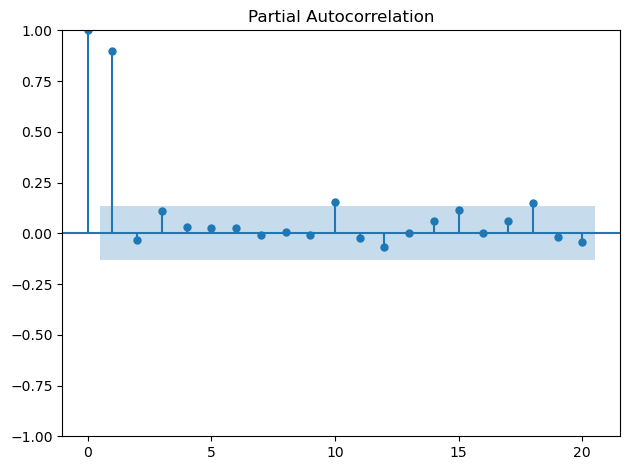

In [62]:
#===============================================================================================================================
# AR: LOG - PACF Plot -  AR(p) order
#===============================================================================================================================
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfln['CloseLn'], lags=20)
plt.tight_layout()

#-------------------------------------------------------------------------------------------------------------------------------
# PACF - order 10 AR(10)
#-------------------------------------------------------------------------------------------------------------------------------
# ****** AR(10) process ******
#-------------------------------------------------------------------------------------------------------------------------------

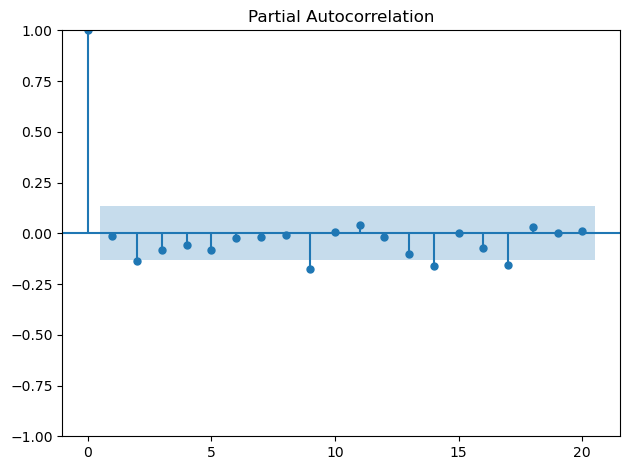

In [63]:
#===============================================================================================================================
# AR: LOG-DIFF - PACF Plot - Identifies the order p of AR process
#===============================================================================================================================
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfln['CloseLnDiff'], lags=20)
plt.tight_layout()

#-------------------------------------------------------------------------------------------------------------------------------
# PACF - NO AUTOCORRELATION
#-------------------------------------------------------------------------------------------------------------------------------
# ****** AR(6) process ******
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# AR: LOG-DIFF - ADF Test + PACF Plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ****** NO RANDOM WALK ******
#-------------------------------------------------------------------------------------------------------------------------------

In [64]:
#===============================================================================================================================
# AR: LOG-DIFF - ROLLING FORECAST
#===============================================================================================================================
pred_ARLnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'AR', (9,0,0))

testln.loc[testini:,'pred_ARLnDiff'] = 0
testln.loc[testini:,'pred_ARLnDiff'] = pred_ARLnDiff
testln.loc[testini:,'pred_ARLnDiff'].to_excel('Data/Output/Rolling-Ln-Monthly-ARMA FracDiff-ARLnDiff.xlsx')
testln

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                  215
# Model:               SARIMAX(9, 0, 0)   Log Likelihood                 282.658
# Date:                Wed, 22 May 2024   AIC                           -545.316
# Time:                        19:10:57   BIC                           -511.609
# Sample:                             0   HQIC                          -531.697
#                                 - 215                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -0.0467      0.061     -0.769      0.442      -0.166       0.072
# ar.L2         -0.1587      0.078     -2.027      0.043      -0.312      -0.005
# ar.L3         -0.1070      0.073     -1.460      0.144      -0.251       0.037
# ar.L4         -0.0808      0.071     -1.135      0.257      -0.221       0.059
# ar.L5         -0.0991      0.087     -1.140      0.254      -0.269       0.071
# ar.L6         -0.0443      0.080     -0.557      0.578      -0.200       0.112
# ar.L7         -0.0497      0.075     -0.666      0.506      -0.196       0.097
# ar.L8         -0.0203      0.071     -0.287      0.774      -0.159       0.118
# ar.L9         -0.1776      0.084     -2.112      0.035      -0.342      -0.013
# sigma2         0.0042      0.000     14.124      0.000       0.004       0.005
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               213.63
# Prob(Q):                              1.00   Prob(JB):                         0.00
# Heteroskedasticity (H):               1.12   Skew:                            -1.09
# Prob(H) (two-sided):                  0.64   Kurtosis:                         7.37
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# phi1 = -0.04673674311765988, phi2 = -0.15870058830952216
#-------------------------------------------------------------------------------------------------------------------------------

                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                  215
Model:               SARIMAX(9, 0, 0)   Log Likelihood                 282.658
Date:                Thu, 13 Jun 2024   AIC                           -545.316
Time:                        18:32:13   BIC                           -511.609
Sample:                             0   HQIC                          -531.697
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0467      0.061     -0.769      0.442      -0.166       0.072
ar.L2         -0.1587      0.078     -2.027      0.043      -0.312      -0.005
ar.L3         -0.1070      0.073     -1.460      0.1

,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff,pred_ARLnDiff
203,2022-12-29,4.056669,NaN,NaN,NaN,NaN
204,2023-01-31,4.093338,4.056669,3.918201,0.009399,0.017690
205,2023-02-28,4.009027,4.093338,3.919055,-0.000361,-0.004796
206,2023-03-31,3.992839,4.009027,3.919492,0.019116,0.017288
207,2023-04-28,4.028022,3.992839,3.919846,0.009661,0.000952
208,2023-05-31,4.064120,4.028022,3.920366,0.004737,-0.001111
209,2023-06-30,4.143223,4.064120,3.921054,0.001206,-0.000497
210,2023-07-31,4.154807,4.143223,3.922112,-0.007369,-0.010220
211,2023-08-31,4.087320,4.154807,3.923215,-0.006965,-0.006809
212,2023-09-29,4.097383,4.087320,3.923989,-0.014860,-0.005252


In [65]:
#===============================================================================================================================
# AR: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARLnDiff'  ])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA  ,6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log Diff     MSE      RMSE
#------------------------------
# 0  MA      0.003016  0.054920
# 1  AR      0.002975  0.054544
#-------------------------------------------------------------------------------------------------------------------------------

,Log Diff,MSE,RMSE
0,MA,0.003016,0.05492
1,AR,0.002975,0.054544


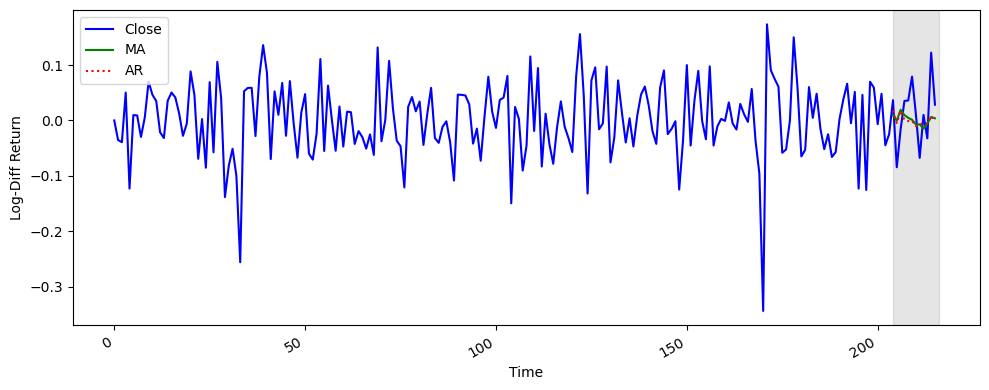

In [66]:
#===============================================================================================================================
# AR: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln['CloseLnDiff']    , 'b-', label='Close')    
ax.plot(testln['pred_MALnDiff'], 'g-', label='MA')   
ax.plot(testln['pred_ARLnDiff'], 'r:', label='AR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

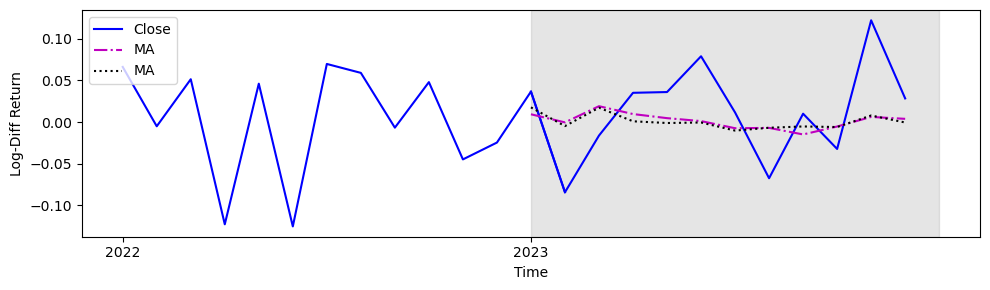

In [67]:
#===============================================================================================================================
# AR: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:testini+1,'CloseLnDiff'],    'b-') 
ax.plot(dfln.loc[testini:totallen,'CloseLnDiff'],    'b-', label='Close')
ax.plot(testln.loc[testini:totallen,'pred_MALnDiff'],  'm-.', label='MA')
ax.plot(testln.loc[testini:totallen,'pred_ARLnDiff'],  'k:', label='MA')
ax.axvspan(testini,testini+testlen, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()

In [68]:
#===============================================================================================================================
# AR: LOG - RECOVER
#===============================================================================================================================
dfln['pred_ARLn'] = 0.0
dfln.loc[testini:,'pred_ARLn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_ARLnDiff']
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn
203,2022-12-29,4.056669,4.056669,-0.024598,0.000000,0.000000,0.000000,0.000000
204,2023-01-31,4.093338,4.093338,0.036669,4.056669,3.918201,4.066068,4.074359
205,2023-02-28,4.009027,4.009027,-0.084311,4.093338,3.919055,4.092977,4.088542
206,2023-03-31,3.992839,3.992839,-0.016189,4.009027,3.919492,4.028143,4.026315
207,2023-04-28,4.028022,4.028022,0.035183,3.992839,3.919846,4.002500,3.993791
208,2023-05-31,4.064120,4.064120,0.036099,4.028022,3.920366,4.032759,4.026911
209,2023-06-30,4.143223,4.143223,0.079102,4.064120,3.921054,4.065327,4.063624
210,2023-07-31,4.154807,4.154807,0.011585,4.143223,3.922112,4.135854,4.133003
211,2023-08-31,4.087320,4.087320,-0.067487,4.154807,3.923215,4.147842,4.147998
212,2023-09-29,4.097383,4.097383,0.010063,4.087320,3.923989,4.072460,4.082069


In [69]:
#===============================================================================================================================
# AR: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6 ))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6 ))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,6 ))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6 ))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#
#-----------------------------
#    Log   MSE       RMSE
#-----------------------------
# 0  Last  0.00326   0.057093
# 1  Mean  0.03408   0.184607
# 2  MA    0.003016  0.054920
# 3  AR    0.002975  0.054544
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.00326,0.057093
1,Mean,0.03408,0.184607
2,MA,0.003016,0.05492
3,AR,0.002975,0.054544


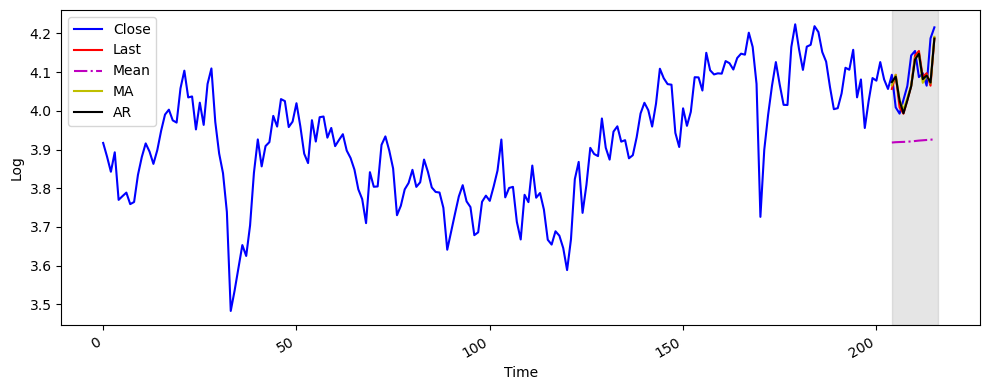

In [70]:
#===============================================================================================================================
# AR: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln['CloseLn']                 , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn'], 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'], 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']  , 'y-' , label='MA')   
ax.plot(dfln.loc[testini:,'pred_ARLn']  , 'k-' , label='AR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


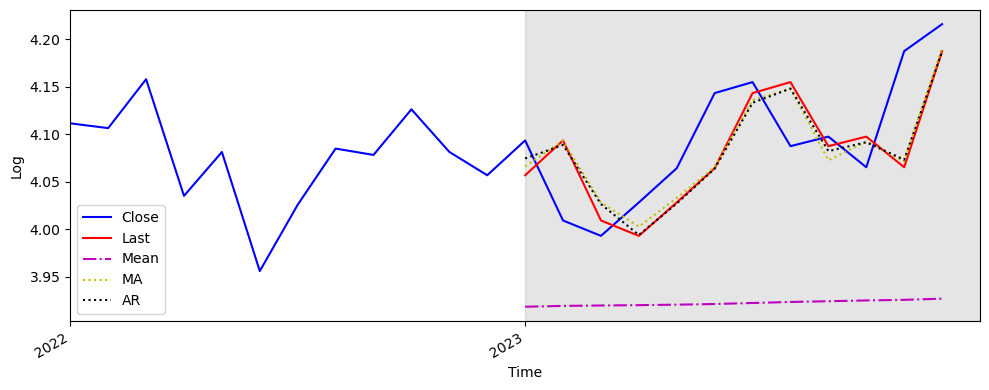

In [71]:
#===============================================================================================================================
# AR: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn']    , 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']      , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']      , 'k:' , label='AR')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [72]:
#===============================================================================================================================
# AR: PRICES - RECOVER
#===============================================================================================================================
df['pred_AR'] = 0.0
#df.loc[testini:,'pred_AR']= np.round(np.exp(dfln.loc[testini:,'pred_ARLn']),2)
df.loc[testini:,'pred_AR']= np.round(dfln.loc[testini:,'pred_ARLn'],2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR
203,2022-12-29,4.056669,0.000000,0.00,0.000000,0.00
204,2023-01-31,4.093338,4.056669,3.92,4.066068,4.07
205,2023-02-28,4.009027,4.093338,3.92,4.092977,4.09
206,2023-03-31,3.992839,4.009027,3.92,4.028143,4.03
207,2023-04-28,4.028022,3.992839,3.92,4.002500,3.99
208,2023-05-31,4.064120,4.028022,3.92,4.032759,4.03
209,2023-06-30,4.143223,4.064120,3.92,4.065327,4.06
210,2023-07-31,4.154807,4.143223,3.92,4.135854,4.13
211,2023-08-31,4.087320,4.154807,3.92,4.147842,4.15
212,2023-09-29,4.097383,4.087320,3.92,4.072460,4.08


In [73]:
#===============================================================================================================================
# AR: PRICES - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,4))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,4))  , "{:,}".format(round(sqrt(mse_Mean),4))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  4))  , "{:,}".format(round(sqrt(mse_MA  ),4))] ,
                ['AR'    , "{:,}".format(round(mse_AR,  4))  , "{:,}".format(round(sqrt(mse_AR  ),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price          MSE   RMSE
#--------------------------------
# 0  Last  0.0033  0.0571
# 1  Mean  0.0341  0.1847
# 2  MA  0.003  0.0549
# 3  AR  0.0032  0.0562
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,0.0033,0.0571
1,Mean,0.0341,0.1847
2,MA,0.003,0.0549
3,AR,0.0032,0.0562


In [74]:
################################################################################################################################
#
# ARMA
#
################################################################################################################################

#===============================================================================================================================
# ARMA: OPTIMIZE Function - AIC (Akaike Information Criterion)
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
             continue
        
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [75]:
#===============================================================================================================================
# ARMA: TRAIN SET
#===============================================================================================================================
train = df.Close[:trainfin+1]
trainLn = dfln.CloseLn[:trainfin+1]
trainLnDiff = dfln.CloseLnDiff[:trainfin+1]
trainLnDiff

0      0.000000
1     -0.035294
2     -0.039166
3      0.050261
4     -0.122912
         ...   
199    0.059142
200   -0.006686
201    0.048026
202   -0.044845
203   -0.024598
Name: CloseLnDiff, Length: 204, dtype: float64

In [91]:
#===============================================================================================================================
# ARMA: PARAMETERS ps, qs
#===============================================================================================================================
from itertools import product
ps = range(0, 2, 1)    
qs = range(0, 13, 1)     

order_list = list(product(ps, qs))
len(order_list)

26

In [93]:
#===============================================================================================================================
# ARMA: Optimize_ARMA
#===============================================================================================================================
result_df = optimize_ARMA(trainLn, order_list) 
result_df

#-------------------------------------------------------------------------------------------------------------------------------
# ps = range(0, 10, 1)    
# qs = range(0, 10, 1)     
#
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 100/100 [06:10<00:00, 8.70s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#     (p,q)          AIC
# -----------------------
# 0  (1, 3)  -507.586218
# 1  (1, 2)  -507.410512
# 2  (1, 0)  -506.936113
# 3  (1, 4)  -505.860208
# 4  (1, 5)  -505.613169
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_16892\3345244493.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/26 [00:00<?, ?it/s]

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: Converge

,"(p,q)",AIC
0,"(1, 3)",-507.586218
1,"(1, 2)",-507.410512
2,"(1, 0)",-506.936113
3,"(1, 4)",-505.860208
4,"(1, 5)",-505.613169
5,"(1, 1)",-505.002267
6,"(1, 6)",-504.903262
7,"(1, 7)",-501.658977
8,"(1, 8)",-501.009171
9,"(1, 10)",-480.906977


In [95]:
#===============================================================================================================================
# ARMA: LOG - ROLLING FORECAST
#===============================================================================================================================
pred_ARMALn = rolling_forecast(dfln['CloseLn'], testini, HORIZON, WINDOW, 'ARMA',(1,0,3))

testln.loc[testini:,'pred_ARMALn'] = 0
testln.loc[testini:,'pred_ARMALn'] = pred_ARMALn
testln.loc[testini:,'pred_ARMALn'].to_excel('Data/Output/Rolling-Ln-Monthly-ARMA FracDiff-ARMALn.xlsx')
testln


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anacond

                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                  215
Model:               SARIMAX(1, 0, 3)   Log Likelihood                 274.378
Date:                Thu, 13 Jun 2024   AIC                           -538.757
Time:                        19:27:17   BIC                           -521.903
Sample:                             0   HQIC                          -531.947
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.001   1282.961      0.000       0.998       1.001
ma.L1         -0.0517      0.061     -0.851      0.395      -0.171       0.067
ma.L2         -0.1739      0.081     -2.144      0.0

,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff,pred_ARLnDiff,pred_ARMALnDiff,pred_ARMALn
203,2022-12-29,4.056669,NaN,NaN,NaN,NaN,NaN,NaN
204,2023-01-31,4.093338,4.056669,3.918201,0.009399,0.017690,0.002722,4.056839
205,2023-02-28,4.009027,4.093338,3.919055,-0.000361,-0.004796,-0.002361,4.098464
206,2023-03-31,3.992839,4.009027,3.919492,0.019116,0.017288,0.009163,4.008533
207,2023-04-28,4.028022,3.992839,3.919846,0.009661,0.000952,0.010753,4.005007
208,2023-05-31,4.064120,4.028022,3.920366,0.004737,-0.001111,0.005488,4.038619
209,2023-06-30,4.143223,4.064120,3.921054,0.001206,-0.000497,0.000293,4.060317
210,2023-07-31,4.154807,4.143223,3.922112,-0.007369,-0.010220,-0.010543,4.132233
211,2023-08-31,4.087320,4.154807,3.923215,-0.006965,-0.006809,-0.011489,4.136351
212,2023-09-29,4.097383,4.087320,3.923989,-0.014860,-0.005252,-0.001678,4.076136


In [111]:
testln.loc[testini:,'pred_ARMALn'].to_excel('Data/Output/Rolling-Ln-Monthly-ARMA FracDiff-ARMALn.xlsx')
testln


,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff,pred_ARLnDiff,pred_ARMALnDiff,pred_ARMALn
203,2022-12-29,4.056669,NaN,NaN,NaN,NaN,NaN,NaN
204,2023-01-31,4.093338,4.056669,3.918201,0.009399,0.017690,0.002722,4.056839
205,2023-02-28,4.009027,4.093338,3.919055,-0.000361,-0.004796,-0.002361,4.098464
206,2023-03-31,3.992839,4.009027,3.919492,0.019116,0.017288,0.009163,4.008533
207,2023-04-28,4.028022,3.992839,3.919846,0.009661,0.000952,0.010753,4.005007
208,2023-05-31,4.064120,4.028022,3.920366,0.004737,-0.001111,0.005488,4.038619
209,2023-06-30,4.143223,4.064120,3.921054,0.001206,-0.000497,0.000293,4.060317
210,2023-07-31,4.154807,4.143223,3.922112,-0.007369,-0.010220,-0.010543,4.132233
211,2023-08-31,4.087320,4.154807,3.923215,-0.006965,-0.006809,-0.011489,4.136351
212,2023-09-29,4.097383,4.087320,3.923989,-0.014860,-0.005252,-0.001678,4.076136


In [97]:
#===============================================================================================================================
# ARMA: LOG - PERFORMANCE
#===============================================================================================================================
#mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], testln.loc[testini:,'pred_MALn'  ])
#mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], testln.loc[testini:,'pred_ARLn'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], testln.loc[testini:,'pred_ARMALn'])

#data_metrics = [['MA'    , "{:,}".format(round(mse_MA  ,6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
#                ['AR'    , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
#                ['ARMA'  , "{:,}".format(round(mse_ARMA,6))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]

data_metrics = [['ARMA'  , "{:,}".format(round(mse_ARMA,6))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log ', 'MSE', 'RMSE'])
df_metrics

,Log,MSE,RMSE
0,ARMA,0.003132,0.055963


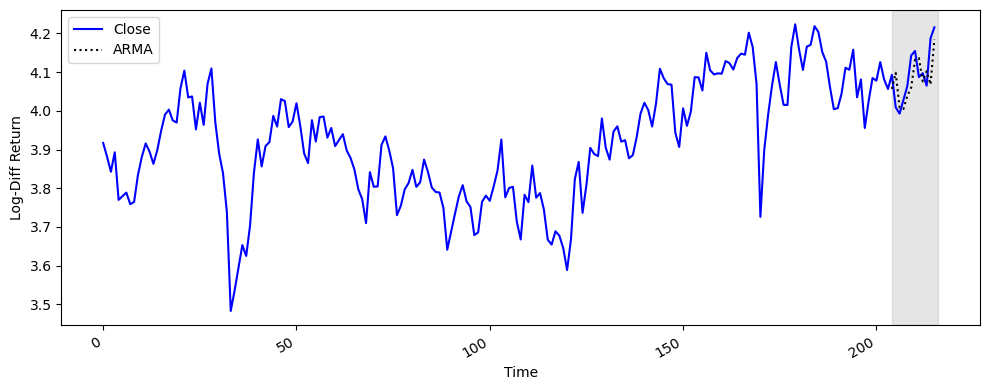

In [98]:
#===============================================================================================================================
# ARMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln['CloseLn']      , 'b-' , label='Close')
#ax.plot(testln['pred_MALn']  , 'g-' , label='MA')
#ax.plot(testln['pred_ARLn']  , 'y-.', label='AR')
ax.plot(testln['pred_ARMALn'], 'k:' , label='ARMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


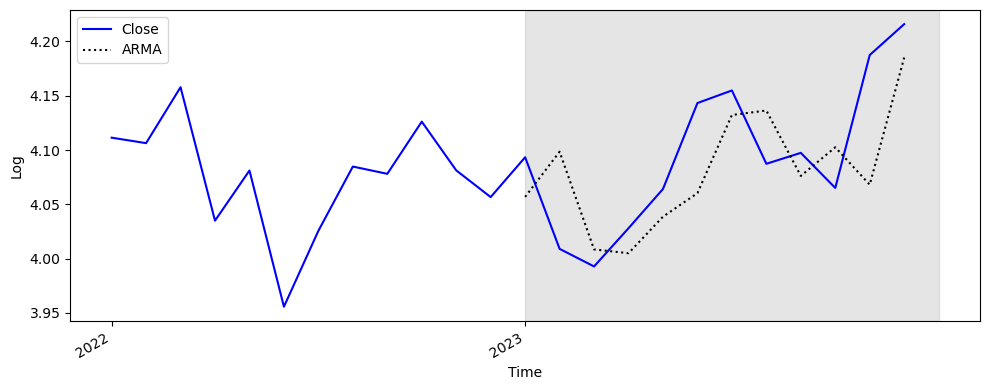

In [100]:
#===============================================================================================================================
# ARMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close')
#ax.plot(testln.loc[-testlen:,'pred_MALn']   , 'g-' , label='MA')
#ax.plot(testln.loc[-testlen:,'pred_ARLn']   , 'y-.', label='AR')
ax.plot(testln.loc[-testlen:,'pred_ARMALn'] , 'k:' , label='ARMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(testini-testlen, totallen, testlen), [2022, 2023])
fig.autofmt_xdate()
plt.tight_layout()



In [101]:
#===============================================================================================================================
# ARMA: LOG - RECOVER
#===============================================================================================================================
#dfln['pred_ARMALn'] = 0.0
#dfln.loc[testini:,'pred_ARMALn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_ARMALnDiff']
#dfln.loc[testini:,'pred_ARMALn'].to_excel('Data/Output/Rolling-Ln-Monthly-ARMA FracDiff-ARMALn.xlsx')
#dfln[testini-1:]

,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn,pred_ARMALn
203,2022-12-29,4.056669,4.056669,-0.024598,0.000000,0.000000,0.000000,0.000000,0.000000
204,2023-01-31,4.093338,4.093338,0.036669,4.056669,3.918201,4.066068,4.074359,4.059391
205,2023-02-28,4.009027,4.009027,-0.084311,4.093338,3.919055,4.092977,4.088542,4.090977
206,2023-03-31,3.992839,3.992839,-0.016189,4.009027,3.919492,4.028143,4.026315,4.018190
207,2023-04-28,4.028022,4.028022,0.035183,3.992839,3.919846,4.002500,3.993791,4.003591
208,2023-05-31,4.064120,4.064120,0.036099,4.028022,3.920366,4.032759,4.026911,4.033510
209,2023-06-30,4.143223,4.143223,0.079102,4.064120,3.921054,4.065327,4.063624,4.064414
210,2023-07-31,4.154807,4.154807,0.011585,4.143223,3.922112,4.135854,4.133003,4.132680
211,2023-08-31,4.087320,4.087320,-0.067487,4.154807,3.923215,4.147842,4.147998,4.143318
212,2023-09-29,4.097383,4.097383,0.010063,4.087320,3.923989,4.072460,4.082069,4.085642


In [102]:
dfln.loc[150:,'pred_ARMALn']

150    0.000000
151    0.000000
152    0.000000
153    0.000000
154    0.000000
         ...   
211    4.143318
212    4.085642
213    4.094411
214    4.066748
215    4.171981
Name: pred_ARMALn, Length: 66, dtype: float64

In [103]:
#===============================================================================================================================
# ARMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8))  , "{:,}".format(round(sqrt(mse_Mean) ,6))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE      RMSE
#--------------------------------
# 0  Last  0.00325965  0.057093
# 1  Mean  0.03407978  0.184607
# 2  MA    0.00301624  0.054920
# 3  AR    0.00297500  0.054544
# 4  ARMA  0.00311383  0.055802
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.00325965,0.057093
1,Mean,0.03407978,0.184607
2,MA,0.00301624,0.05492
3,AR,0.002975,0.054544
4,ARMA,0.00311383,0.055802


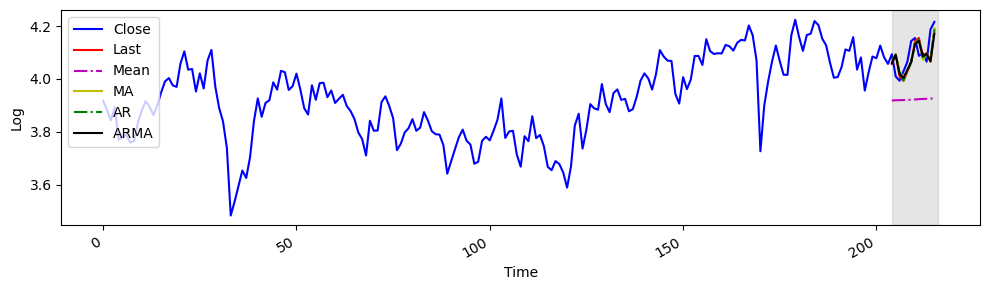

In [104]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Log - Plot
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln['CloseLn'], 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn'], 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'], 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']  , 'y-' , label='MA')   
ax.plot(dfln.loc[testini:,'pred_ARLn']  , 'g-.', label='AR')   
ax.plot(dfln.loc[testini:,'pred_ARMALn'], 'k-' , label='ARMA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


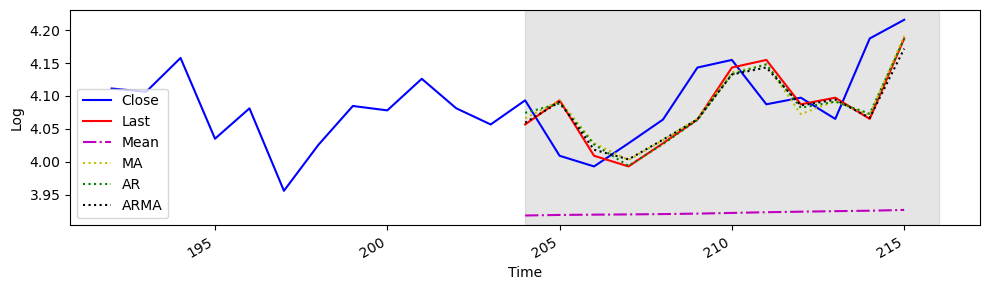

In [105]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Log - Plot (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']   , 'b-', label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']   , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g:' , label='AR')
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'k:' , label='ARMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks([testini-totallen, totallen],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [106]:
#===============================================================================================================================
# ARMA: PRICE - RECOVER
#===============================================================================================================================
df['pred_ARMA'] = 0.0
#df.loc[testini:,'pred_ARMA']= np.round(np.exp(dfln.loc[testini:,'pred_ARMALn']),2)
df.loc[testini:,'pred_ARMA']= np.round(dfln.loc[testini:,'pred_ARMALn'],2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR,pred_ARMA
203,2022-12-29,4.056669,0.000000,0.00,0.000000,0.00,0.00
204,2023-01-31,4.093338,4.056669,3.92,4.066068,4.07,4.06
205,2023-02-28,4.009027,4.093338,3.92,4.092977,4.09,4.09
206,2023-03-31,3.992839,4.009027,3.92,4.028143,4.03,4.02
207,2023-04-28,4.028022,3.992839,3.92,4.002500,3.99,4.00
208,2023-05-31,4.064120,4.028022,3.92,4.032759,4.03,4.03
209,2023-06-30,4.143223,4.064120,3.92,4.065327,4.06,4.06
210,2023-07-31,4.154807,4.143223,3.92,4.135854,4.13,4.13
211,2023-08-31,4.087320,4.154807,3.92,4.147842,4.15,4.14
212,2023-09-29,4.097383,4.087320,3.92,4.072460,4.08,4.09


In [107]:
#===============================================================================================================================
# ARMA: Log - Performance
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])
mse_ARMA = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR,  6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,6))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Model        MSE     RMSE
#-----------------------------
# 0  Last   0.003260  0.057093
# 1  Mean   0.034098  0.184658
# 2  MA     0.003016  0.054920
# 3  AR     0.003162  0.056230
# 4  ARMA   0.003103  0.055706
#-------------------------------------------------------------------------------------------------------------------------------

,Model,MSE,RMSE
0,Last,0.00326,0.057093
1,Mean,0.034098,0.184658
2,MA,0.003016,0.05492
3,AR,0.003162,0.05623
4,ARMA,0.003103,0.055706


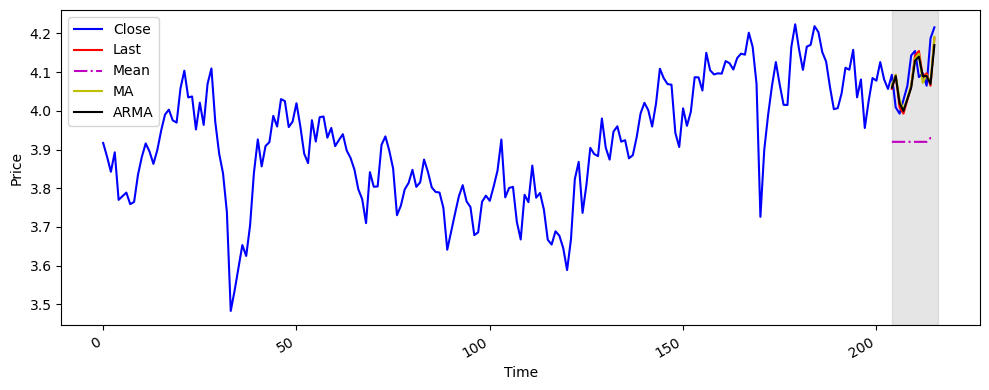

In [108]:
#===============================================================================================================================
# ARMA: Log - Recover - Plot
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']  , 'y-' , label='MA')   
#ax.plot(df.loc[testini:,'pred_AR']  , 'g-.', label='AR')   
ax.plot(df.loc[testini:,'pred_ARMA'], 'k-' , label='ARMA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

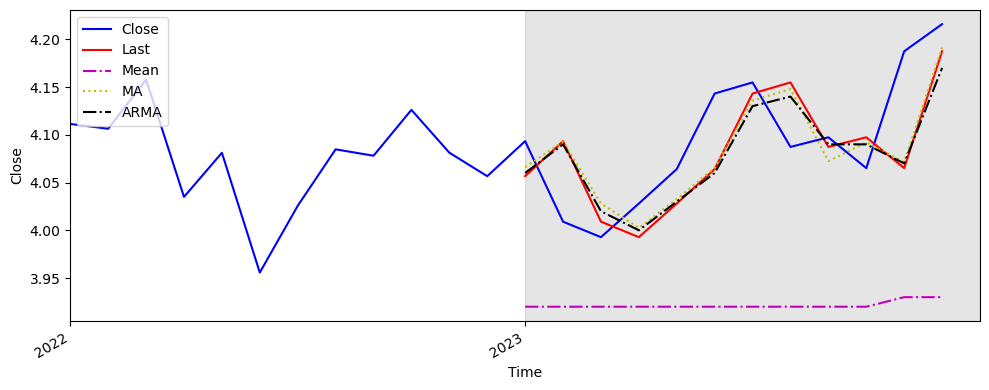

In [109]:
#===============================================================================================================================
# ARMA: Log - Recover - Plot (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close']  , 'b-' , label='Close')
ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']  , 'y:' , label='MA')
#ax.plot(df.loc[testini:,'pred_AR']  , 'g:' , label='AR')
ax.plot(df.loc[testini:,'pred_ARMA'], 'k-.', label='ARMA')

ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [151]:
################################################################################################################################
#
# ARIMA
#
################################################################################################################################

#===============================================================================================================================
# ARIMA: optimize_ARIMA() FUNCTION - AIC - fits all unique ARIMA(p,q) models
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
#from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
#please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:     
    
    results = []   

    for order in tqdm_notebook(order_list):    
    #for order in tqdm.notebook.tqdm(order_list):    
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)     
        except:
            continue 
        
        aic = model.aic   
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)    
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)   
    
    return result_df

In [152]:
#===============================================================================================================================
# ARIMA: LOG - TRAIN SET - trainln
#===============================================================================================================================
trainln = dfln.CloseLn[:testini]
trainln

0      3.917126
1      3.881832
2      3.842665
3      3.892926
4      3.770014
         ...   
199    4.084772
200    4.078086
201    4.126112
202    4.081267
203    4.056669
Name: CloseLn, Length: 204, dtype: float64

In [153]:
#===============================================================================================================================
# ARIMA: LOG - PARAMETERS list
#===============================================================================================================================
from itertools import product
#-------------------------------------------------------------------------------------------------------------------------------
# Stationary Random walk with 1 diff
#-------------------------------------------------------------------------------------------------------------------------------
d = 1

#-------------------------------------------------------------------------------------------------------------------------------
# AR(6), MA(6)
#-------------------------------------------------------------------------------------------------------------------------------
ps = range(0, 10, 1)   
qs = range(0, 10, 1)   

order_list = list(product(ps, qs)) 
len(order_list)

100

In [154]:
#===============================================================================================================================
# ARIMA: LOG - PARAMETERRS - optimize_ARIMA (AIC)
#===============================================================================================================================
result_df = optimize_ARIMA(trainln, order_list, d) 
result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 100% 96/96  [05:34<00:00, 9.52s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#--------------------------
#      (p,q)            AIC
#--------------------------
# 0  (6, 0)   -29721.251056
# 1  (0, 6)   -29720.113831
# 2  (7, 0)   -29719.570317
# 3  (6, 1)   -29719.206557
4 #  (0, 7)   -29719.055646
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_14300\2456808453.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sari

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\states

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\states

4

In [155]:
#===============================================================================================================================
# ARIMA: LOG - FORECAST
#===============================================================================================================================
model = SARIMAX(trainln, order=(1,1,1), simple_differencing=False)   
model_fit = model.fit(disp=False)

In [156]:
#===============================================================================================================================
# ARIMA: Log - Summary
#===============================================================================================================================
print(model_fit.summary())

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                CloseLn   No. Observations:                  204
# Model:               SARIMAX(1, 1, 1)   Log Likelihood                 263.454
# Date:                Wed, 22 May 2024   AIC                           -520.908
# Time:                        19:24:28   BIC                           -510.968
# Sample:                             0   HQIC                          -516.887
#                                 - 204                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1          0.8095      0.061     13.330      0.000       0.690       0.928
# ma.L1         -0.9449      0.038    -24.892      0.000      -1.019      -0.870
# sigma2         0.0044      0.000     13.850      0.000       0.004       0.005
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               170.26
# Prob(Q):                              0.37   Prob(JB):                         0.00
# Heteroskedasticity (H):               1.16   Skew:                            -1.03
# Prob(H) (two-sided):                  0.53   Kurtosis:                         6.99
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
#-------------------------------------------------------------------------------------------------------------------------------

                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                  204
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 263.454
Date:                Wed, 22 May 2024   AIC                           -520.908
Time:                        19:24:28   BIC                           -510.968
Sample:                             0   HQIC                          -516.887
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8095      0.061     13.330      0.000       0.690       0.928
ma.L1         -0.9449      0.038    -24.892      0.000      -1.019      -0.870
sigma2         0.0044      0.000     13.850      0.0

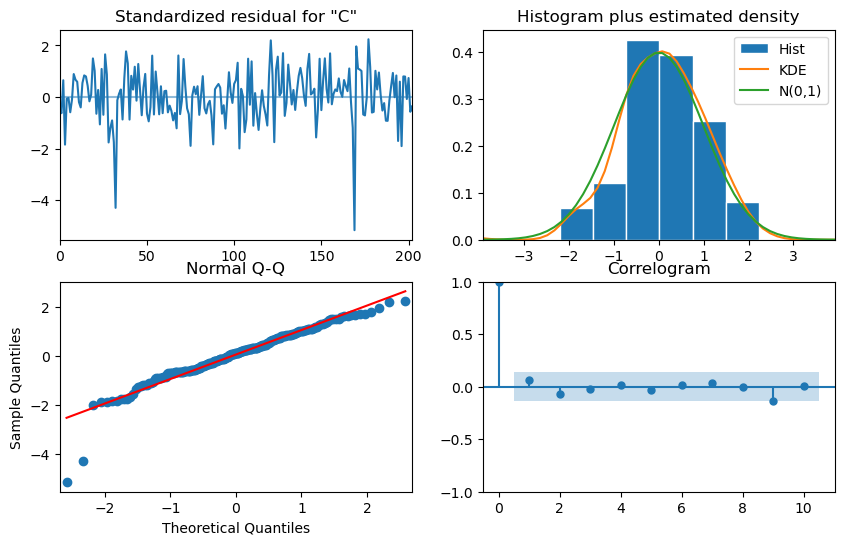

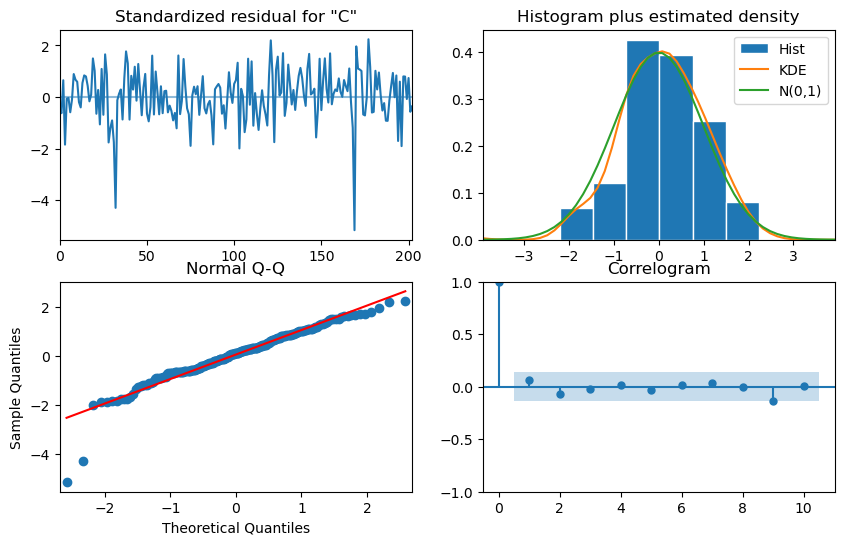

In [157]:
#===============================================================================================================================
# ARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
model_fit.plot_diagnostics(figsize=(10,6))

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not constant (discrepancy to white noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => Residuals’ distribution close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => White Noise.
#
#-------------------------------------------------------------------------------------------------------------------------------

In [158]:
#===============================================================================================================================
# ARIMA: LOG - RESIDUALS - Ljung-Box test (10 lags)
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
residuals = model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))    
#print(pvalue)

#-------------------------------------------------------------------------------------------------------------------------------
# Ljung-Box test
#-------------------------------------------------------------------------------------------------------------------------------
#       lb_stat  lb_pvalue
# --  ---------  ---------
# 11   0.342893        1.0
#-------------------------------------------------------------------------------------------------------------------------------
#
# pvalue > 0.05 => Residuals Not Correlated
#
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => MODEL can be used to Forecast *****
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
11,0.342893,1.0


In [159]:
#===============================================================================================================================
# ARIMA: LOG - RESULTS
#===============================================================================================================================
ARIMA_pred = model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_ARIMALn'] = 0
dfln['pred_ARIMALn'] = ARIMA_pred
dfln.loc[testini:,'pred_ARIMALn'].to_excel('Data/Output/Rolling-Ln-Monthly-ARMA FracDiff-ARIMALn.xlsx')
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn,pred_ARMALn,pred_ARIMALn
203,2022-12-29,4.056669,4.056669,-0.024598,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
204,2023-01-31,4.093338,4.093338,0.036669,4.056669,3.918201,4.066068,4.074359,4.059391,4.059399
205,2023-02-28,4.009027,4.009027,-0.084311,4.093338,3.919055,4.092977,4.088542,4.090977,4.061609
206,2023-03-31,3.992839,3.992839,-0.016189,4.009027,3.919492,4.028143,4.026315,4.018190,4.063399
207,2023-04-28,4.028022,4.028022,0.035183,3.992839,3.919846,4.002500,3.993791,4.003591,4.064847
208,2023-05-31,4.064120,4.064120,0.036099,4.028022,3.920366,4.032759,4.026911,4.033510,4.066019
209,2023-06-30,4.143223,4.143223,0.079102,4.064120,3.921054,4.065327,4.063624,4.064414,4.066968
210,2023-07-31,4.154807,4.154807,0.011585,4.143223,3.922112,4.135854,4.133003,4.132680,4.067736
211,2023-08-31,4.087320,4.087320,-0.067487,4.154807,3.923215,4.147842,4.147998,4.143318,4.068358
212,2023-09-29,4.097383,4.097383,0.010063,4.087320,3.923989,4.072460,4.082069,4.085642,4.068861


In [160]:
#===============================================================================================================================
# ARIMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])
mse_ARIMA  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last) ,8))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8 ))  , "{:,}".format(round(sqrt(mse_Mean) ,8))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)   ,8))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)   ,8))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA) ,8))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,8))  , "{:,}".format(round(sqrt(mse_ARIMA),8))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE        RMSE
#--------------------------------
# 0  Last  0.00325965  0.05709336
# 1  Mean  0.03407978  0.18460711
# 2  MA    0.00301624  0.05492034
# 3  AR    0.00297500  0.05454360
# 4  ARMA  0.00311383  0.05580166
# 5  ARIMA 0.00500338  0.07073460
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.00325965,0.05709336
1,Mean,0.03407978,0.18460711
2,MA,0.00301624,0.05492034
3,AR,0.002975,0.0545436
4,ARMA,0.00311383,0.05580166
5,ARIMA,0.00500338,0.0707346


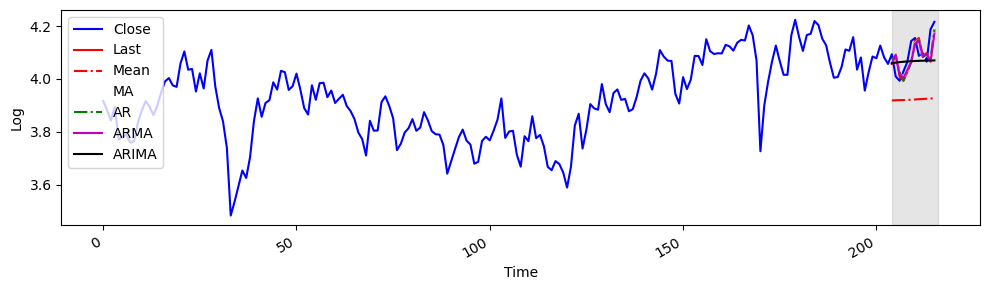

In [163]:
#===============================================================================================================================
# ARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln['CloseLn'], 'b-', label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'r-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']   , 'w-' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g-.', label='AR') 
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'm-' , label='ARMA')
ax.plot(dfln.loc[testini:,'pred_ARIMALn'], 'k-' , label='ARIMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


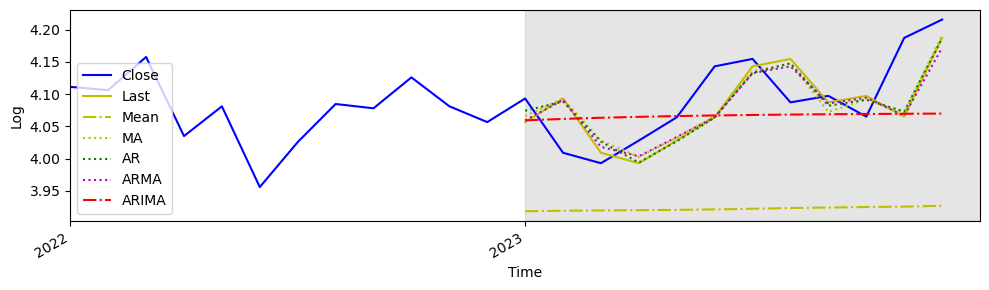

In [164]:
#===============================================================================================================================
# ARIMA: Log - Plot (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']   , 'b-' , label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'y-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'y-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']   , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g:' , label='AR')
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'm:' , label='ARMA')
ax.plot(dfln.loc[testini:,'pred_ARIMALn'], 'r-.', label='ARIMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [ ]:
################################################################################################################################
#
# SARIMA
#
################################################################################################################################

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - DECOMPOSITION
#===============================================================================================================================
from statsmodels.tsa.seasonal import STL
decomposition = STL(dfln['CloseLn'], period=12).fit()  

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))   
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
#plt.xticks(np.arange(0, totallen, 12), np.arange(2000, 2024, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ad_fuller_result = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ad_fuller_result[0],2)}')
print(f'ADF p-value  : {np.round(ad_fuller_result[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -1.0
# ADF p-value  : 0.75
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# SARIMA: FUNCTION - optimize_SARIMA
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:   
    
    results = []
    
    for order in tqdm_notebook(order_list):   
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
    
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df 


In [ ]:
#===============================================================================================================================
# SARIMA: PARAMETERS p, d, q ; P, Q, D
#===============================================================================================================================
from itertools import product

ps = range(0, 11, 1)   
qs = range(0, 11, 1)   

#ps = range(0, 7, 1)
#qs = range(0, 8, 1)
Ps = [0]
Qs = [0]
d = 1
D = 0
s = 21

order_list = list(product(ps, qs, Ps, Qs))
len(order_list)

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - AIC - optimize_SARIMA()
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 100% 121/121 [09:37<00:00, 15.69s/it]
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------
#           (p,q)            AIC
#-------------------------------
# 0  (6, 0, 0, 0)  -29721.251056
# 1  (0,10, 0, 0)  -29720.501491
# 2  (0, 6, 0, 0)  -29720.113831
# 3  (7, 0, 0, 0)  -29719.570317
# 4  (6, 1, 0, 0)  -29719.206557
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - FORECAST
#===============================================================================================================================
ARIMA_model = SARIMAX(trainln, order=(6,1,0), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - SUMMARY
#===============================================================================================================================
print(ARIMA_model_fit.summary())

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => white noise.
#
# ***** WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
#residuals = model_fit.resid
residuals = ARIMA_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#
#--------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11   1.313341   0.999802
#
#-------------------------------------------------------------------------------------------------------------------------------
#
# LJUNG-BOX test: pvalue > 0.05 => Residuals are Not Correlated.
#
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => model can be used to Forecast *****
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - RESULTS
#===============================================================================================================================
SARIMA_pred = ARIMA_model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_SARIMALn'] = SARIMA_pred  
dfln.loc[testini:,'pred_SARIMALn'].to_excel('Data/Output/Rolling-Ln-Monthly-SARIMALn.xlsx')
dfln.loc[testini:, ['Date','CloseLn', 'pred_ARIMALn', 'pred_SARIMALn']]
#dfln.loc[testini-1:]

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'  ])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'  ])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'    ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'    ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'  ])
mse_ARIMA  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn' ])
mse_SARIMA = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last)  ,8))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8 ))  , "{:,}".format(round(sqrt(mse_Mean)  ,8))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)    ,8))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)    ,8))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA)  ,8))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,8))  , "{:,}".format(round(sqrt(mse_ARIMA) ,8))] ,
                ['SARIMA', "{:,}".format(round(mse_SARIMA,8)) , "{:,}".format(round(sqrt(mse_SARIMA),8))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE        RMSE
#--------------------------------
# 0  Last  0.00011731  0.01083083
# 1  Mean  0.80500390  0.89722010
# 2  MA    0.00011758  0.01084329
# 3  AR    0.00011792  0.01085896
# 4  ARMA  0.00011754  0.01084139
# 5  ARIMA 0.00620595  0.07877786
# 6 SARIMA 0.01142979  0.10691020
#-------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#===============================================================================================================================
# SARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[:,'CloseLn']             , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']  , 'r-', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']  , 'w-', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn'] , 'm-', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMALn'], 'k:', label='SARIMA')   
ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#===============================================================================================================================
# SARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'] , 'b-' , label='Close' )
ax.plot(dfln.loc[testini:,'pred_LastLn']     , 'r-' , label='Last'  )
ax.plot(dfln.loc[testini:,'pred_MeanLn']     , 'r-.', label='Mean'  )
ax.plot(dfln.loc[testini:,'pred_MALn']       , 'y:' , label='MA'    )
ax.plot(dfln.loc[testini:,'pred_ARLn']       , 'g:' , label='AR'    )
ax.plot(dfln.loc[testini:,'pred_ARMALn']     , 'm:' , label='ARMA'  )
ax.plot(dfln.loc[testini:,'pred_ARIMALn']    , 'k-' , label='ARIMA' )
ax.plot(dfln.loc[testini:,'pred_SARIMALn']   , 'y-.', label='SARIMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [ ]:
################################################################################################################################
#
# SARIMA SEASONAL
#
################################################################################################################################


In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ADF_SARIMAS = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ADF_SARIMAS[0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -1.0
# ADF p-value  : 0.75
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG-DIFF - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ADF_SARIMAS = adfuller(dfln['CloseLnDiff'])
print(f'ADF Statistic: {np.round(ADF_SARIMAS [0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS [1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -16.89
# ADF p-value  : 0.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG-DIFF-SEASONAL - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
dflndiffseasonal = dfln['CloseLn'].diff(periods=12)
ADF_SARIMAS = adfuller(dflndiffseasonal[12:])
print(f'ADF Statistic: {np.round(ADF_SARIMAS[0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -12.9
# ADF p-value  : 0.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------
dflndiffseasonal

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - TRAIN SET
#===============================================================================================================================
trainln

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: PARAMETERS p, d, q ; P, Q, D
#===============================================================================================================================
ps = range(0, 4, 1)    
qs = range(0, 3, 1)
Ps = range(0, 2, 1)
Qs = range(0, 2, 1)

d = 1
D = 1
s = 21
order_list = list(product(ps, qs, Ps, Qs))
print(len(order_list))

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - AIC optimize_SARIMA()
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# ps = range(0, 4, 1)    
# qs = range(0, 3, 1)
# Ps = range(0, 2, 1)
# Qs = range(0, 2, 1)
# 
# d = 1
# D = 1
# s = 21
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 48/48 [36:39<00:00, 111.83s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#    (p, q, P, Q)           AIC
# -- ------------- --------------
# 0  (0, 2, 1, 1)  94646.816811
# 1  (2, 0, 1, 1)  94646.922782
# 2  (1, 0, 1, 1)  94647.810345
# 3  (3, 0, 1, 1)  94648.856431
# 4  (0, 2, 0, 1)  94649.546759
# 5  (0, 1, 1, 1)  94649.557991
#--------------------------------
# Old
# 0  (2, 2, 1, 1)   2112.846797
# 1  (3, 1, 1, 1)  94742.017364
# 2  (2, 1, 0, 1)  94744.227821
# 3  (0, 2, 0, 1)  94744.450239
# 4  (2, 0, 0, 1)  94744.479125
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================

SARIMA_model = SARIMAX(trainln, order=(0,1,2), seasonal_order=(1,1,1,21), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

# Process time: 2" 

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - SUMMARY
#===============================================================================================================================
print(SARIMA_model_fit.summary())

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - DIAGNOSTICS
#===============================================================================================================================
SARIMA_model_fit.plot_diagnostics(figsize=(10,6))


In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
residuals = SARIMA_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[20], return_df=True)

#-------------------------------------------------------------------------------------------------------------------------------
#      lb_stat  lb_pvalue
#------------------------
# 20  1.535884        1.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# p-values > 0.78 => Null Hypothesis Not Rejected => Residuals Independent, Residuals Not Correlated
#-------------------------------------------------------------------------------------------------------------------------------
# ****** WHITE NOISE RESIDUALS ******
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
SARIMA_model_fit.get_prediction(testini, totallen).predicted_mean

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================
SARIMAS_pred = SARIMA_model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_SARIMASLn'] = SARIMAS_pred
dfln.loc[testini:,'pred_SARIMASLn'].to_excel('Data/Output/Rolling-Ln-Monthly-SARIMASLn.xlsx')
dfln.loc[testini-1:, ['Date', 'CloseLn', 'pred_ARIMALn', 'pred_SARIMALn' , 'pred_SARIMASLn']]


In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'    ])
mse_Mean     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'    ])
mse_MA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'      ])
mse_AR       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'      ])
mse_ARMA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'    ])
mse_ARIMA    = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'   ])
mse_SARIMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'  ])
mse_SARIMAS  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn' ])

data_metrics = [['Last'    , "{:,}".format(round(mse_Last  ,6))  , "{:,}".format(round(sqrt(mse_Last)    ,6))] ,
                ['Mean'    , "{:,}".format(round(mse_Mean  ,6))  , "{:,}".format(round(sqrt(mse_Mean)    ,6))] ,
                ['MA'      , "{:,}".format(round(mse_MA    ,6))  , "{:,}".format(round(sqrt(mse_MA)      ,6))] ,
                ['AR'      , "{:,}".format(round(mse_AR    ,6))  , "{:,}".format(round(sqrt(mse_AR)      ,6))] ,
                ['ARMA'    , "{:,}".format(round(mse_ARMA  ,6))  , "{:,}".format(round(sqrt(mse_ARMA)    ,6))] ,
                ['ARIMA'   , "{:,}".format(round(mse_ARIMA ,6))  , "{:,}".format(round(sqrt(mse_ARIMA)   ,6))] ,
                ['SARIMA'  , "{:,}".format(round(mse_SARIMA,6))  , "{:,}".format(round(sqrt(mse_SARIMA)  ,6))] ,
                ['SARIMAS' , "{:,}".format(round(mse_SARIMAS,6)) , "{:,}".format(round(sqrt(mse_SARIMAS),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])

#row_new = {'Model':'ARIMA', 'MSE':round(mse_ARIMA,4), 'RMSE':round(sqrt(mse_ARIMA),4) }
#data_metrics = data_metrics.append(row_new, ignore_index=True)

df_metrics
#-------------------------------------------------------------------------------------------------------------------------------
#  Model         MSE      RMSE
#-------------------------------------------------------------------------------------------------------------------------------
# 0  Last     0.000117  0.010831
# 1  Mean     0.805004  0.897220
# 2  MA       0.000118  0.010843
# 3  AR       0.000118  0.010859
# 4  ARMA     0.000118  0.010841
# 5  ARIMA    0.006206  0.078778
# 6  SARIMA   0.011430  0.106910
# 7  SARIMAS  0.002782  0.052747
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[ :      ,'CloseLn']        , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'w-', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'm-', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'g-', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMALn']  , 'r-', label='SARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'k-', label='SARIMAS')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#===============================================================================================================================
# SARIMA SEASONAL: PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']  , 'b-', label='Close')    
ax.plot(dfln.loc[testini:  ,'pred_LastLn']    , 'w-', label='Last')
ax.plot(dfln.loc[testini:  ,'pred_ARMALn']    , 'm-', label='ARMA')   
ax.plot(dfln.loc[testini:  ,'pred_ARIMALn']   , 'g-', label='ARIMA')   
ax.plot(dfln.loc[testini:  ,'pred_SARIMALn']  , 'r-.', label='SARIMA')   
ax.plot(dfln.loc[testini:  ,'pred_SARIMASLn'] , 'k-.', label='SARIMA_S')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([ testini-testlen, testini ], [ 2022           , 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
################################################################################################################################
################################################################################################################################
#
# ROLLING ARIMA
#
################################################################################################################################
################################################################################################################################


In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LIBRARIES
#===============================================================================================================================
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

#===============================================================================================================================
# ROLLING ARIMA: LOG - LISTS
#===============================================================================================================================
CloseList = dfln['CloseLn'].values
CloseTrain, CloseTest = CloseList[0:trainlen], CloseList[testini:]
HistTrain = [x for x in CloseTrain]
PredTest = list()

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - AUTOARIMA - AIC
#===============================================================================================================================
import pandas as pd
import pmdarima as pmd

results = pmd.auto_arima(dfln['CloseLn'],
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=12,   # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=12,   # max guess for MA(q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# AIC
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
# Total fit time: 8.761 seconds
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - AUTOARIMA - BIC
#===============================================================================================================================
results = pmd.auto_arima(dfln['CloseLn'],
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=12,    # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=12,    # max guess for MA(q)
                         trend='c',
                         information_criterion='bic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# BIC
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
# Total fit time: 3.963 seconds
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - FORECAST
#===============================================================================================================================
for t in range(testlen):
    
    ARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,1), simple_differencing=False)
    ARIMA_ROLL_model_fit = ARIMA_ROLL_model.fit(disp=False)

    output = ARIMA_ROLL_model_fit.forecast()
    yhat = output[0]
    PredTest.append(yhat)
    yobs = CloseTest[t]
    HistTrain.append(yobs)
    print('t = %d, Estimation = %f, Observed = %f' % (t, yhat, yobs))
    dfln.loc[trainlen+t,'pred_ARIMARLn'] = yhat
    

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - RESULTS
#===============================================================================================================================
#dfln.drop('pred_RARIMA', axis=1, inplace=True)
#dfln.rename(columns={"pred_RARIMALn": "pred_ARIMARLn"}, inplace=True)

dfln.loc[testini-1:,['Date','Close', 'pred_ARIMALn', 'pred_SARIMALn','pred_ARIMARLn']]


In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'      ])
mse_Mean        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'      ])
mse_MA          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'        ])
mse_AR          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'        ])
mse_ARMA        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'      ])
mse_ARIMA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'     ])
mse_SARIMA      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'    ])
mse_SARIMAS     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn'   ])
mse_ARIMAR      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMARLn'    ])

data_metrics = [['Last'       , "{:,}".format(round(mse_Last     ,6)), "{:,}".format(round(sqrt(mse_Last)   ,6))] ,
                ['Mean'       , "{:,}".format(round(mse_Mean     ,6)), "{:,}".format(round(sqrt(mse_Mean)   ,6))] ,
                ['MA'         , "{:,}".format(round(mse_MA       ,6)), "{:,}".format(round(sqrt(mse_MA)     ,6))] ,
                ['AR'         , "{:,}".format(round(mse_AR       ,6)), "{:,}".format(round(sqrt(mse_AR)     ,6))] ,
                ['ARMA'       , "{:,}".format(round(mse_ARMA     ,6)), "{:,}".format(round(sqrt(mse_ARMA)   ,6))] ,
                ['ARIMA'      , "{:,}".format(round(mse_ARIMA    ,6)), "{:,}".format(round(sqrt(mse_ARIMA)  ,6))] ,
                ['SARIMA'     , "{:,}".format(round(mse_SARIMA   ,6)), "{:,}".format(round(sqrt(mse_SARIMA) ,6))] ,
                ['SARIMAS'    , "{:,}".format(round(mse_SARIMAS  ,6)), "{:,}".format(round(sqrt(mse_SARIMAS),6))] ,
                ['RARIMA'     , "{:,}".format(round(mse_ARIMAR   ,6)), "{:,}".format(round(sqrt(mse_ARIMAR) ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])
df_metrics

#rmse = sqrt(mean_squared_error(CloseTest, PredTest))
#print('Test RMSE: %.3f' % rmse)

#-------------------------------------------------------------------------------------------------------------------------------
#    Model        MSE      RMSE
#------------------------------
# 0  Last    0.000117  0.010831
# 1  Mean    0.805004  0.897220
# 2  MA      0.000118  0.010843
# 3  AR      0.000118  0.010859
# 4  ARMA    0.000118  0.010841
# 5  ARIMA   0.006206  0.078778
# 6  SARIMA  0.011430  0.106910
# 7  SARIMAS 0.002782  0.052747
# 8  RARIMA  0.000118  0.010858
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT
#===============================================================================================================================
pyplot.plot(CloseTest, color='blue')
pyplot.plot(PredTest, color='red')
pyplot.show()


In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - SUMMARY
#===============================================================================================================================
print(ARIMA_ROLL_model_fit.summary())

#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                 5942
# Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
# Date:                Sat, 27 Apr 2024   AIC                         -31162.874
# Time:                        21:14:18   BIC                         -31149.495
# Sample:                             0   HQIC                        -31158.226
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
# sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10750.78
# Prob(Q):                              0.92   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.38
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
ARIMA_ROLL_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => white noise.
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

residuals = ARIMA_ROLL_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11    0.70408   0.999992
#
#-------------------------------------------------------------------------------------------------------------------------------
# LJUNG-BOX test: pvalue > 0.05 => Residuals NOT CORRELATED
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => Model can be used to FORECAST *****
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[       :,'CloseLn']        , 'b-' , label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'y:' , label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'w-.', label='ARMA')
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'm-.', label='ARIMA') 
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'r-.', label='SARIMAS')
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'k-' , label='ARIMAR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'y:' , label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'w-.', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'm-.', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'r-.', label='SARIMAS')   
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'k-' , label='ARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([testini-testlen, testini, totallen ], [ 2022, 2023, 2024])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - RECOVER
#===============================================================================================================================
df['pred_ARIMAR'] = 0.0
df.loc[testini:,'pred_ARIMAR']= np.round(np.exp(dfln.loc[testini:,'pred_ARIMARLn']),2)
df[testini-1:]

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'  ])
mse_Mean   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'  ])
mse_MA     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'    ])
mse_AR     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'    ])
mse_ARMA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'  ])
#mse_ARIMA  = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMA'])
#mse_SARIMAS= mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMAS'])
mse_ARIMAR = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMAR'])

data_metrics = [['Last'      , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last)   ,))] ,
                ['Mean'      , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean)   ,))] ,
                ['MA'        , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA)     ,))] ,
                ['AR'        , "{:,}".format(round(mse_AR,  ))  , "{:,}".format(round(sqrt(mse_AR)     ,))] ,
                ['ARMA'      , "{:,}".format(round(mse_ARMA,))  , "{:,}".format(round(sqrt(mse_ARMA)   ,))] ,
                ['ARIMAR'    , "{:,}".format(round(mse_ARIMAR,)), "{:,}".format(round(sqrt(mse_ARIMAR) ,))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Model            MSE   RMSE
#--------------------------------
# 0  Last       1,476,001  1,215
# 1  Mean   3,357,125,693 57,941
# 2  MA         1,482,532  1,218
# 3  AR         1,483,149  1,218
# 4  ARMA       1,481,847  1,217
# 5  RARIMA     1,482,795  1,218
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last']   , 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean']   , 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']     , 'y-' , label='MA')
ax.plot(df.loc[testini:,'pred_AR']     , 'g-.', label='AR')
ax.plot(df.loc[testini:,'pred_ARMA']   , 'k-' , label='ARMA')
ax.plot(df.loc[testini:,'pred_ARIMAR'] , 'k-' , label='ARIMAr')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-PERIOD:,'Close']    , 'b-' , label='Close')
ax.plot(df.loc[testini+1:  ,'pred_Last']   , 'r-' , label='Last')
ax.plot(df.loc[testini+1:  ,'pred_Mean']   , 'w-.', label='Mean')
ax.plot(df.loc[testini+1:  ,'pred_MA']     , 'y-' , label='MA')
ax.plot(df.loc[testini+1:  ,'pred_AR']     , 'g-.', label='AR')
ax.plot(df.loc[testini+1:  ,'pred_ARMA']   , 'm-' , label='ARMA')
ax.plot(df.loc[testini+1:  ,'pred_ARIMAR'] , 'k-.', label='ARIMAR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini], [2022, 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
################################################################################################################################
################################################################################################################################
#
# ROLLING ARIMA SEASONAL
#
################################################################################################################################
################################################################################################################################


In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - AUTO_ARIMA - AIC
#===============================================================================================================================
import pandas as pd
import pmdarima as pmd

results = pmd.auto_arima(trainln,
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=15,    # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=15,    # max guess for MA(q)
                         m=21,        # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# p,d,q,m: 15,1,15,21
# Best model:  ARIMA(0,1,1)(0,0,0)[21] intercept Total fit time: 53.391 seconds AIC=-29710.797
#-------------------------------------------------------------------------------------------------------------------------------
# p,d,q,m: 15,1,15,5
# Best model:  ARIMA(0,1,1)(0,0,0) [5] intercept Total fit time: 11.277 seconds AIC=-29710.797
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - AUTO_ARIMA - BIC
#===============================================================================================================================
results = pmd.auto_arima(trainln,
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=15,   # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=15,   # max guess for MA(q)
                         m=21,       # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='bic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[21] Total fit time: 16.358 seconds
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[5]  Total fit time: 7.869 seconds
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: OPTIMIZE_SARIMA - AIC
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 
# d = 1
# D = 1
# s = 21
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 100/100 [35:25<00:00, 41.88s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#    (p, q, P, Q)           AIC
# -- ------------- --------------


In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - LISTS
#===============================================================================================================================
CloseList = dfln['CloseLn'].values
CloseTrain, CloseTest = CloseList[:testini], CloseList[testini:]
HistTrain = [x for x in CloseTrain]
PredTest = list()

#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================
for t in range(testlen):
    SARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,1), seasonal_order=(0,0,0,21), simple_differencing=False)
    #SARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,0), seasonal_order=(0,0,0,5), simple_differencing=False)
    
    SARIMA_ROLL_model_fit = SARIMA_ROLL_model.fit(disp=False)

    output = SARIMA_ROLL_model_fit.forecast()
    yhat = output[0]
    PredTest.append(yhat)
    yobs = CloseTest[t]
    #if t>1 : break
    HistTrain.append(yobs)
    print('t = %d, Estimation = %f, Observed = %f' % (t, yhat, yobs))
    dfln.loc[testini+t,'pred_SARIMARLn'] = yhat
    

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
pyplot.plot(CloseTest)
pyplot.plot(PredTest, color='red')
pyplot.show()


In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - SUMMARY
#===============================================================================================================================
print(SARIMA_ROLL_model_fit.summary())

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                 5942
# Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
# Date:                Tue, 26 Mar 2024   AIC                         -31162.874
# Time:                        14:25:00   BIC                         -31149.495
# Sample:                             0   HQIC                        -31158.226
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
# sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10750.78
# Prob(Q):                              0.92   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.38
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - DIAGNOSTICS
#===============================================================================================================================
SARIMA_ROLL_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: Only one significant Coefficients after lag 0, at lag 9 => close to White Noise.
#
# ***** ~ WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
#residuals = model_fit.resid
residuals = SARIMA_ROLL_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11   0.67458    0.999993 (21)
#  11   0.723067   0.99999   (5)
#-------------------------------------------------------------------------------------------------------------------------------
# LJUNG-BOX test: pvalue > 0.05 => Residuals NOT CORRELATED.
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => Model can be used to FORECAST *****
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - RESULTS
#===============================================================================================================================
#dfln.rename(columns={"pred_SARIMAS_ROLLLn": "pred_SARIMARLn"}, inplace=True)
dfln[testini-1:]


In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])
#mse_ARIMA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn' ])
#mse_SARIMA      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'])
#mse_SARIMAS     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn'])
mse_ARIMAR      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMARLn'])
mse_SARIMAR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMARLn'])

data_metrics = [['Last'       , "{:,}".format(round(mse_Last       ,6)), "{:,}".format(round(sqrt(mse_Last)       ,6))] ,
                ['Mean'       , "{:,}".format(round(mse_Mean       ,6)), "{:,}".format(round(sqrt(mse_Mean)       ,6))] ,
                ['MA'         , "{:,}".format(round(mse_MA         ,6)), "{:,}".format(round(sqrt(mse_MA)         ,6))] ,
                ['AR'         , "{:,}".format(round(mse_AR         ,6)), "{:,}".format(round(sqrt(mse_AR)         ,6))] ,
                ['ARMA'       , "{:,}".format(round(mse_ARMA       ,6)), "{:,}".format(round(sqrt(mse_ARMA)       ,6))] ,
                ['ARIMA'      , "{:,}".format(round(mse_ARIMA      ,6)), "{:,}".format(round(sqrt(mse_ARIMA)      ,6))] ,
                ['SARIMA'     , "{:,}".format(round(mse_SARIMA     ,6)), "{:,}".format(round(sqrt(mse_SARIMA)     ,6))] ,
                ['SARIMAS'    , "{:,}".format(round(mse_SARIMAS    ,6)), "{:,}".format(round(sqrt(mse_SARIMAS)    ,6))] ,
                ['ARIMAR'     , "{:,}".format(round(mse_ARIMAR     ,6)), "{:,}".format(round(sqrt(mse_ARIMAR)     ,6))] ,
                ['SARIMAR'    , "{:,}".format(round(mse_SARIMAR    ,6)), "{:,}".format(round(sqrt(mse_SARIMAR)    ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#---------------------------------
#    Log           MSE      RMSE
#---------------------------------
# 0  Last     0.000117  0.010831
# 1  Mean     0.805004  0.897220
# 2  MA       0.000118  0.010843
# 3  AR       0.000118  0.010859
# 4  ARMA     0.000118  0.010841
# 5  ARIMA    0.006206  0.078778
# 6  SARIMA   0.006206  0.078778
# 7  SARIMAS  0.002782  0.052747
# 8  ARIMAR   0.000118  0.010858
# 9  SARIMAR  0.000118  0.010858
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING SARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[:,'CloseLn']                       , 'b-', label='Close')    
#ax.plot(dfln.loc[testini:,'pred_LastLn']       , 'r:', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']        , 'g-', label='ARMA roll')   
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'm-', label='ARIMAR')   
ax.plot(dfln.loc[testini:,'pred_SARIMARLn'], 'k:', label='SARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen-testlen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#===============================================================================================================================
# ROLLING SARIMA SEASONAL: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen: ,'CloseLn']        , 'b-',  label='Close')    
ax.plot(dfln.loc[testini:         ,'pred_LastLn']    , 'y:',  label='Last')    
ax.plot(dfln.loc[testini:         ,'pred_ARMALn']    , 'm-.', label='ARMA')   
ax.plot(dfln.loc[testini:         ,'pred_ARIMALn']   , 'm-.', label='ARIMA')   
ax.plot(dfln.loc[testini:         ,'pred_ARIMARLn']  , 'r-.', label='ARIMAR')   
ax.plot(dfln.loc[testini:         ,'pred_SARIMARLn'] , 'k-.', label='SARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen) 
plt.xticks([ testini-testlen, testini ], [ 2022           , 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - RECOVER
#===============================================================================================================================
df['pred_SARIMAR'] = 0.0
df.loc[testini:,'pred_SARIMAR']= np.round(np.exp(dfln.loc[testini:,'pred_SARIMARLn']),2)

df[testini-1:]

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])
mse_ARMA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'])
mse_ARIMAR = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMAR'])
mse_SARIMAR= mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMAR'])

data_metrics = [['Last'      , "{:,}".format(round(mse_Last,))   , "{:,}".format(round(sqrt(mse_Last)   ,))] ,
                ['Mean'      , "{:,}".format(round(mse_Mean,))   , "{:,}".format(round(sqrt(mse_Mean)   ,))] ,
                ['MA'        , "{:,}".format(round(mse_MA,  ))   , "{:,}".format(round(sqrt(mse_MA)     ,))] ,
                ['AR'        , "{:,}".format(round(mse_AR,  ))   , "{:,}".format(round(sqrt(mse_AR)     ,))] ,
                ['ARMA'      , "{:,}".format(round(mse_ARMA,))   , "{:,}".format(round(sqrt(mse_ARMA)   ,))] ,
                ['ARIMA'     , "{:,}".format(round(mse_ARIMA,))  , "{:,}".format(round(sqrt(mse_ARIMA)  ,))] ,
                ['ARIMAR'    , "{:,}".format(round(mse_ARIMAR,)) , "{:,}".format(round(sqrt(mse_ARIMAR) ,))] ,
                ['SARIMAR'   , "{:,}".format(round(mse_SARIMAR,)), "{:,}".format(round(sqrt(mse_SARIMAR),))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price              MSE   RMSE
#---------------------------------
# 0  Last     1,476,001  1,215
# 1  Mean 3,357,125,693 57,941
# 2  MA       1,482,532  1,218
# 3  AR       1,483,149  1,218
# 4  ARMA     1,481,847  1,217
# 5  ARIMA            0      0
# 6  ARIMAR   1,482,795  1,218
# 7  SARIMAR  1,482,795  1,218
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last']     , 'r-' , label='Last'    )
ax.plot(df.loc[testini:,'pred_Mean']     , 'm-.', label='Mean'    )
ax.plot(df.loc[testini:,'pred_MA']       , 'y-' , label='MA'      )   
ax.plot(df.loc[testini:,'pred_AR']       , 'g-.', label='AR'      )   
ax.plot(df.loc[testini:,'pred_ARMA']     , 'w-' , label='ARMA'    )   
ax.plot(df.loc[testini:,'pred_ARIMAR']   , 'g-' , label='ARIMAR'  )   
ax.plot(df.loc[testini:,'pred_SARIMAR']  , 'k-' , label='SARIMAR' )   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close'] , 'b-' , label='Close')    
ax.plot(df.loc[testini:,'pred_Last']     , 'r-' , label='Last')
#ax.plot(df.loc[testini:,'pred_Mean']     , 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']       , 'y-' , label='MA')   
ax.plot(df.loc[testini:,'pred_AR']       , 'g-.', label='AR')   
ax.plot(df.loc[testini:,'pred_ARMA']     , 'w-' , label='ARMA')   
ax.plot(df.loc[testini:,'pred_ARIMAR']   , 'g-' , label='ARIMAR')   
ax.plot(df.loc[testini:,'pred_SARIMAR']  , 'k-' , label='SARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()

